Diese hier zur Testierung vorgelegte Lösung wurde durch
folgendes Team erarbeitet:

Studierender 1: Pana, Christian | 11117043

Studierender 2: Pooth, Matthias | 11124943

KORREKTUR
=========


In [ ]:
# Einbinden des eigenen Google-Drive
# - CLM auf den erscheinenden Link
# - Google-Konto auswaehlen
# - Die Verwendung zulassen (ggf. ganz nach unten scrollen)
# - Den angezeigten authorization code in die Zwischenablage kopieren
# - Zurueck zu dieser Seite und den authorization code in die umrandete Box aus der Zwischenablage einfuegen
# - Die Eingabe mit RETURN abschliessen
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Definition des Basis-Verzeichnisses
# Dieses wird hier so festgelegt, dass man im Google-Drive unter 
#     /Colab_Drive/ML_TH/
# arbeitet. Das BASEDIR MUSS BEREITS EXISTIEREN, also von Hand oder durch ein Skript angelegt worden sein.
BASEDIR='/content/drive/My Drive/Colab_Drive/ML_TH/'

# Weitere vorausgesetzte Verzeichnisse anlegen
import os
if os.path.exists(BASEDIR + 'Data_Input'):
  print("Das Verzeichnis  "+BASEDIR+'Data_Input'+"   existiert bereits")
else:
  os.mkdir(BASEDIR + 'Data_Input')

if os.path.exists(BASEDIR + 'Temp'):
  print("Das Verzeichnis  "+BASEDIR+'Temp'+"   existiert bereits")
else:
  os.mkdir(BASEDIR + 'Temp')

# Die ML-Lib importieren. Diese muss im zuvor definierten BASEDIR stehen
import os
os.chdir(BASEDIR)
import ML_Lib as ml
ml.vers()

Das Verzeichnis  /content/drive/My Drive/Colab_Drive/ML_TH/Data_Input   existiert bereits
Das Verzeichnis  /content/drive/My Drive/Colab_Drive/ML_TH/Temp   existiert bereits


0.9

In [ ]:
# Alle weiteren immer verwendeten Libs importieren
import numpy as np
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt

# Steuerparameter für die Kapitel dieses Notebooks

ACHTUNG: Nach der Änderung der Parameter muss die Code-Zelle auch IMMER AUSGEFÜHRT WERDEN !!!

In [ ]:
FLIPPED_CLASS_ROOM_PROJEKT_1 = True #@param ["False", "True"] {type:"raw"}

# Vorlage komprimieren mit PCA
AUFGABE_1  = True #@param ["False", "True"] {type:"raw"}

# Deaktivierung der PCA
AUFGABE_2 = True #@param ["False", "True"] {type:"raw"}

# Sichtung und Analyse der Weindaten
AUFGABE_3 = True #@param ["False", "True"] {type:"raw"}

# Weinqualitaetsbestimmung MIT PCA
AUFGABE_4 = True #@param ["False", "True"] {type:"raw"}

# Weinqualitaetsbestimmung OHNE PCA
AUFGABE_5 = True #@param ["False", "True"] {type:"raw"}


# **Flipped-Class-Room-Projekt: Regression mittels Inverse-Matrix-Verfahren,Standardisieren, PCA, anhand von Kreuzfahrtschiffsdaten**
In diesem Projekt wollen wir auf Basis von vorhandenen Daten von Kreuzfahrschiffen abschätzen welche Crew-Größe für ein neu zu bauendes Schiff benötigt wird. Die Daten werden in Form der Pandas-CSV-Datei "kreuzfahrtschiffe.csv" zur Verfügung gestellt. Diese Datei MUSS in das Verzeichnis "/content/drive/My Drive/Colab_Drive/ML_TH/Data_Input" kopiert werden.

## 1 Daten einlesen, grob sichten und erste Korrelationsanalye



In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  import os
  os.chdir(BASEDIR + '/Data_Input/')
  cwd = os.getcwd()
  print("Wir sind im Verzeichnis:", cwd)
  %ls

Wir sind im Verzeichnis: /content/drive/My Drive/Colab_Drive/ML_TH/Data_Input
kreuzfahrtschiffe.csv  muenzen.csv  rotweinqualitaet.csv  weinsorten.csv


In [ ]:
df = 0  
if FLIPPED_CLASS_ROOM_PROJEKT_1 : 
  # Einlesen der Daten
  df=pd.read_csv(BASEDIR + '/Data_Input/' + 'kreuzfahrtschiffe.csv')

In der obigen Tabelle sind die Werte für "Max_Passagiere", "Anzahl_Kabinen" und "Anzahl_Crew_Mitglieder" in Hunderter angegeben. 

### 1a. Grobe Sichtung

#### Paarweises Auftragen aller Daten (Merkmale und Zielwert)

In [ ]:
 if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  # Die Daten einlesen 
  cols = [ 'BRT', 'Max_Passagiere', 'Alter','Laenge', 'Anzahl_Kabinen','Dichte_Passagiere','Anzahl_Crew_Mitglieder']
  data = ml.pandas_to_numpy_matrix(df, cols)

  # Zu den Daten den Scatter-Matrix-Plot ausgeben
  fig = ml.scatterplot_matrix( data, 
                            cols,
                            linestyle='none', marker='.', color='blue', mfc='none')
  fig.suptitle('Scatter-Matrix-Plot der sinnvollen Daten')
  plt.show()

Bei diesem recht überschaubaren Beispiel kann man anhand der oben (in der unteren Zeile) dargestellten Plots direkt erkennen, dass eine starke lineare Abhängigkeit zwischen "Anzahl_Crew_Mitglieder" und "BRT", "Max_Passagiere", "Laenge" und "Anzahl_Kabinen" besteht. Des Weiteren kann man sehen, dass eine weniger ausgeprägte aber dennoch gut feststellbare gegenläufige (also negative) Korrelation zwischen "Anzahl_Crew_Mitglieder" und "Alter" besteht. Eine sehr geringe Korrelation besteht zwischen "Anzahl_Crew_Mitglieder" und "Dichte_Passagiere".

#### Darstellug der Histogramme zu allen Merkmalen und zum Ausgabewert


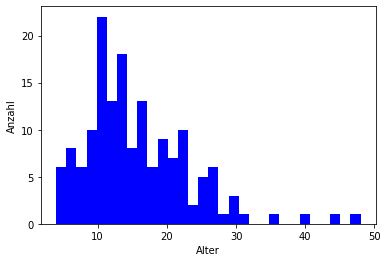

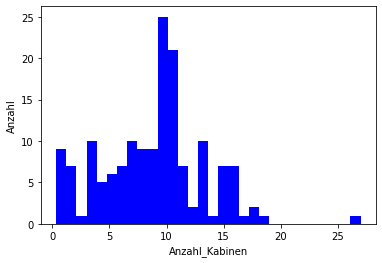

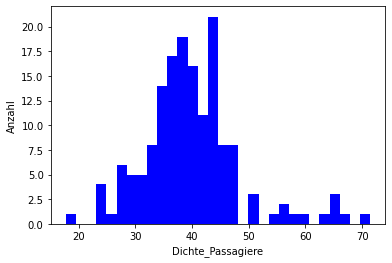

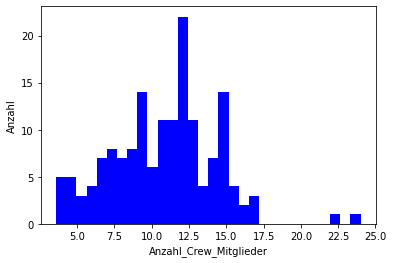

In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  anzahl_balken_im_histogramm = 30

  for i in range(data.shape[1]):
    plt.hist(data[:,i], bins = anzahl_balken_im_histogramm,color='blue',) 
    plt.xlabel(cols[i])
    plt.ylabel("Anzahl")
    plt.show()
    
  



### 1.b Korrelationsanalyse
Hierzu werden die Statistiken eines jeden Merkmals (einer jeden Spalte)

1.) zunächst mittelwertfrei gemacht und

2.) danach so normiert, dass jedes Merkmal eine Varianz von 1 hat.

Diese Art der Umrechnung nennt man Standardisierung. Aus X wird somit ein X_std (std steht für standardisiert) berechnet.

3.) Zu dieser Matrix X wird dann die Kovarianz einer Spalte (eines Merkmals) zu jeder anderen Spalte (jedem anderen Merkmal) berechnet.

Da die Merkmale standardisiert sind, stellt die Kovarianzmatrix auch direkt die Korrelationsmatrix dar, also wie stark ein Merkmal mit jedem anderen Merkmal linear korreliert.

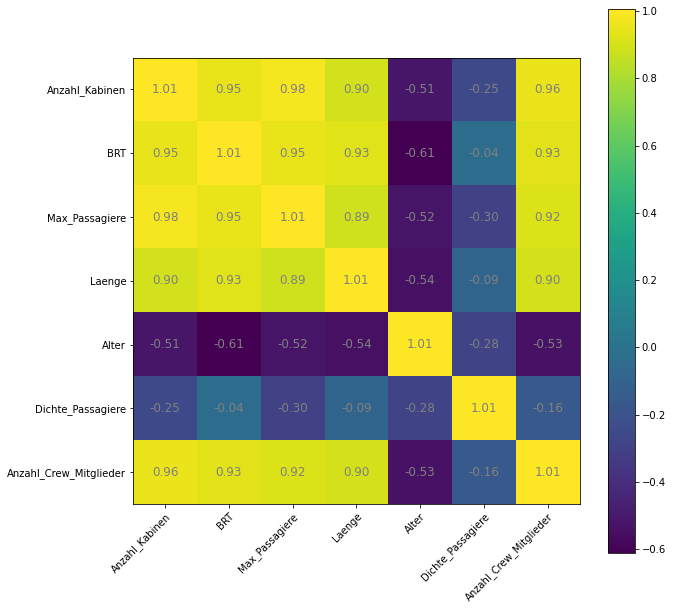

In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  # Definition des Daten-Sub-Sets, also der Daten zu der die Kovarianzmatrix bestimmt werden soll 
  cols = [ 'Anzahl_Kabinen', 'BRT', 'Max_Passagiere', 'Laenge', 'Alter','Dichte_Passagiere', 'Anzahl_Crew_Mitglieder']
  
  #[ 'BRT','Max_Passagiere', 'Alter','Laenge', 'Anzahl_Kabinen','Dichte_Passagiere','Anzahl_Crew_Mitglieder']

  # Konvertierung der Daten vom Pandas-DF-Format in das Numpy-Format
  X = ml.pandas_to_numpy_matrix(df, cols)


  # Normieren so dass je Spalte
  #   1.) Der Mittewert und die Standardabweichung (Wurzel aus Varianz) berechnet werden
  #   2.) Die Werte der Spalten mit deren Mittelwert (M) und Standardabweichung (S) wie folgt normiert werden Out = (In - M)/S
  mean_X_std_col = ml.get_functionvalue_of_matrix_columns(X,np.mean)
  standard_abweichung_col = ml.get_functionvalue_of_matrix_columns(X,np.std)

  X_std = ml.scale_of_matrix_columns(X, mean_X_std_col, standard_abweichung_col)


  # Die Kovarianzmatrix der standardisierten Merkmale berechnen und als Heatmap ausgeben
  cov_mat = ml.covariance_matrix(X_std) # Kovarianzmatrix berechnen

  cols = cols      # Beschriftung der Heatmap bestimmen
  rows = cols
  schriftgroesse = 12 # Schriftgroesse fuer die Kaestchen bestimmen

  ml.show_matrix_as_heatplot(cov_mat, rows, cols, schriftgroesse) # Heatmap erzeugen und ausgeben

Dass in der obigen Korrelationsmatrix in der Diagonalen 1.01 statt 1.0 steht ist der Rechenungenauigkeit geschuldet.
Es gibt auch eine ML-Funktion die direkt die Korrelationsmatrix berechnet und die Standardisierung implizit aber numerisch geschickter ausführt.

In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  # Die Kovarianzmatrix kann auch sehr rudimentaer ausgegeben werden
  np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
  for i in range(len(cols)):
    with np.printoptions(precision=2, suppress=True):
      print(cov_mat[i],'\t',i,cols[i])

[ 1.01  0.95  0.98  0.9  -0.51 -0.25  0.96] 	 0 Anzahl_Kabinen
[ 0.95  1.01  0.95  0.93 -0.61 -0.04  0.93] 	 1 BRT
[ 0.98  0.95  1.01  0.89 -0.52 -0.3   0.92] 	 2 Max_Passagiere
[ 0.9   0.93  0.89  1.01 -0.54 -0.09  0.9 ] 	 3 Laenge
[-0.51 -0.61 -0.52 -0.54  1.01 -0.28 -0.53] 	 4 Alter
[-0.25 -0.04 -0.3  -0.09 -0.28  1.01 -0.16] 	 5 Dichte_Passagiere
[ 0.96  0.93  0.92  0.9  -0.53 -0.16  1.01] 	 6 Anzahl_Crew_Mitglieder


Wie wir anhand der unteren Zeile der Korrelationsmatrix sehen, hat uns unser "optischer Eindruck" nicht getäuscht.

##2 PARAMETRIERUNG und Datenfluss der Berechnungen
Im weiteren Verlauf werden die im Folgenden genannten Berechnungsschritte 3 bis 8 durchgeführt. Die Ein- und Ausgabe-Daten (IN => OUT) für den jeweiligen Berechnungsschritt sowie die Parameter (Einstellmöglichkeiten) für den jeweiligen Berechnungsschritte sind wie folgt:

**3.) Aufteilung der Daten**
> X => X_train, X_test <br>
> y => y_train, y_test <br>

>**SELEKTIERTE_MERKMALE = ...**: Definiert welche Merkmale dabei berücksichtigt werden.

>**BIAS_BERUECKSICHTIGEN = 1**: Das Vorhersage-Modell berücksichtigt einen Bias indem an die ursprüngliche Eingabematrix X ganz rechts eine Spalte mit
lauter EINSEN angehängt wird.
 
**4.) Standardisieren**

> X_train => X_train_std <br>
X_test => X_test_std <br>
y_train => y_train_std <br> 
y_test => y_test_std

>**STANDADISIERUNG = 1**: Eine Standardisierung der Eingabedaten wird durchgeführt, ansonsten wird nur kopiert.

>**STANDADISIERUNG_AUCH_DER_AUSGABEDATEN = 1:** Optional kann man zusätzlich auch die Ausgabedaten noch standardisieren um alle Daten dann numerisch guenstiger zu gestalten.

**5.) Hauptkomponentenanalyse**

**6.) Hauptkomponententransformation** und gleichzeitig <br>
&emsp;&emsp;**Selektion der Hauptkomponenten**

> X_train_std => X_train_reg <br>
X_test_std => X_test_reg

&emsp;&emsp; X_train_reg wird dann für das Training (die Regression verwendet). <br>
&emsp;&emsp; X_test_reg wird dann für den Test verwendet.

>**HAUPTKOMPONENTENTRANSFORMATION = 1**: Eine Hauptkomponenten-Transformation der Eingabedaten wird durchgeführt, ansonsten wird nur kopiert.

>**HAUPTKOMPONENTEN_DIMENSIONEN = n**: Nur die ersten (besten) n hauptkomponenten-transformierten "Merkmale" werden genommen.

**7.) Regression (Training)**

> X_train_reg, y_train_reg  => W_IM   
Bem.: Das "_IM" steht für "gemäss Inverse-Matrix-Verfahren berechnet".

**8a.) Vorhersagen für den Trainings- und Testdatensatz berechnen**

> X_train_reg => y_train_pred_IM <br>
X_test_reg => y_test_pred_IM

**8b.) Reskalieren (Rückstandardisierung)**, d.h. alles was zuvor standardisiert wurde muss bezüglich der Vorhersagen "rückgängig gemacht werden"

> y_train_pred_IM => y_train_pred_stdback_IM <br>
y_test_pred_IM => y_test_pred_stdback_IM

>**HAUPTKOMPONENTENTRANSFORMATION = 1**: Eine Hauptkomponenten-Rücktransformation der Ausgabedaten wird durchgeführt, ansonsten wird nur kopiert.

**8.) Überprüfung der Lösung durch Vergleich von Soll- und Ist-Werte der Vorhersagen** <br>
&emsp;&emsp; Die Vorhergersagen (Ist-Werte: y_train_pred_std_back_IM, y_test_pred_std_back_IM) werden mit den Soll-Werten y_train, y_test  <br>
&emsp;&emsp; verglichen. Dies z.B. mittels MSE.





In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  # Hier die Paramater gemaess den vorangestellten Erlaueterungen einstellen

  # Angeordnet nach Betrag der Korrelation mit "Anzahl_Crew_Mitglieder"
  # bezogen auf den GESAMTDATENSATZ. Die Reihenfolge aendert sich (zum Glueck) bei Trainingsdatensatz nicht.
  SELEKTIERTE_MERKMALE = [ 'Anzahl_Kabinen', 'BRT', 'Max_Passagiere', 'Laenge', 'Alter','Dichte_Passagiere']
  #SELEKTIERTE_MERKMALE = [ 'Anzahl_Kabinen', 'BRT', 'Max_Passagiere', 'Laenge', 'Alter']
  #SELEKTIERTE_MERKMALE = [ 'Anzahl_Kabinen', 'BRT', 'Max_Passagiere', 'Laenge']
  #SELEKTIERTE_MERKMALE = [ 'Anzahl_Kabinen', 'BRT', 'Max_Passagiere']
  #SELEKTIERTE_MERKMALE = [ 'Anzahl_Kabinen', 'BRT']
  #SELEKTIERTE_MERKMALE = [ 'Anzahl_Kabinen']


  BIAS_BERUECKSICHTIGEN =  1          # 1 =>  Die Eingabematrix X fuer das Inverse-Matrix-Verfahren
                                      #       wird um eine ganz rechte Spalte mit lauter EINSEN ergaenzt.
                                      #       Dadurch wird (ueber die Daten) ein Bias implementiert, der 
                                      #       zunaechst nicht beruecktsichtugt wurde. 
                    

  STANDADISIERUNG = 1                 # Spaltenweise (also je Merkmal) eine Standardisierung durchfuehren
                                      # ACHTUNG:  Wenn eine Standardisierung durchgefuehrt wird, dann muss der Bias nicht 
                                      #           explizit beruecksichtigt werden, da dies dann schon implizit mit der Standardisierung
                                      #           beruecksichtigt wird. Es schadet aber auch nicht wenn man den Bias trotzdem noch explizit
                                      #           beruecksichtigt.

  STANDADISIERUNG_AUCH_DER_AUSGABEDATEN = 0 # Optional kann man auch die Ausgabedaen noch standardisieren
                                            # um alle Daten dann numerisch guenstiger zu gestalten.

  HAUPTKOMPONENTENTRANSFORMATION = 1  # ACHTUNG: Wenn die Hauptkomponententransformation aktiviert wird, 
                                      # dann MUSS auch die Standardisierung aktiviert werden.

  HAUPTKOMPONENTEN_DIMENSIONEN = 2    # ACHTUNG:  Dieser Wert muss in folgendem Wertebereich liegen 
                                      #           1 < HAUPTKOMPONENTEN_DIMENSIONEN <= Anzahl Einträge in SELEKTIERTE_MERKMALE
                                      #           Grund: Man kann die Anzahl der aus der Hauptkoponententransformation
                                      #           zu verwendenten Merkmale nicht mit 5 definieren wenn in die Transformation nur 3
                                      #           originale Merkmale "hinein gegangen sind", denn es gehen dann auch maximal nur 3 heraus.


## 3 Aufteilung der Daten in einen Trainings- und Testdatensatz 

In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  # Selektion der Merkmale die verwendet werden sollen
  # Die eigentliche Definition erfolge ueber SELEKTIERTE_MERKMALE
  # bereits weiter oben.
  cols_selected_X = SELEKTIERTE_MERKMALE

  # Formale Selektion der Zielwerte. Dies ist immer "Anzahl_Crew_Mitglieder" bei unserer Aufgabenstellung
  cols_selected_y = ['Anzahl_Crew_Mitglieder']


  # Erzeugung der entsprechende NumPy-Matrizen
  X = ml.pandas_to_numpy_matrix(df, cols_selected_X) # Merkmal-Matrix
  y = ml.pandas_to_numpy_matrix(df, cols_selected_y) # Zielwert-Matrix


In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  # Aufteilung der selektierten Daten in Trainings- und Test-Datensätze
  # 60% gehen in den Trainingsdatensatz, 40% in den Testdatensatz und der Rest (in diesem Fall 0%) in den Validierungsdatensatz
  # Damit die Signatur der Funktion erfuellt wird muessen fuer den Validierungsdatensatz dummy_1 und dummy_2 angegeben werden.
  X_train, X_test, dummy_1, y_train, y_test, dummy_2  = ml.split_matrix_horizontal(X, y , percent_train=60, percent_test=40)

  print(X_train.shape,X_test.shape, y_train.shape,y_test.shape, cols_selected_X)


(94, 6) (63, 6) (94, 1) (63, 1) ['Anzahl_Kabinen', 'BRT', 'Max_Passagiere', 'Laenge', 'Alter', 'Dichte_Passagiere']


### Testweise die Korrelationsmatrix nur fuer die Trainingsdaten berechnen

Oben haben wir die Korrelationsmatrix auf Basis ALLER Daten (also Trainings- und Test-Daten) berechnet.

Die PCA wird allerdings nur auf den Trainingsdaten durchgeführt. Damit wir "bei unserer händischen Analyse das Gleiche sehen wie die PCA" führen wir nun "sicherheitshalber" diese Berechnung der Korrelationsmatrix nur auf Basis der Trainingsdaten durch. 

Wir sehen, dass sich die Korrelationswerte schon erkennbar geändert haben. Die Reihenfolge der "Wichtigkeit" ist allerdings gleich geblieben.

In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  # Definition des Daten-Sub-Sets, also der Daten zu der die Kovarianzmatrix bestimmt werden soll 
  #cols_Xy = [ 'BRT','Max_Passagiere', 'Alter','Laenge', 'Anzahl_Kabinen','Dichte_Passagiere','Anzahl_Crew_Mitglieder']
  cols_Xy = np.hstack ((cols_selected_X,cols_selected_y))

  # Zusammenfuehren von X_train und y_train in eine Matrix Xy und fuer diese Matrix die Korrelationen bestimmen
  Xy_train = np.hstack((X_train, y_train))

  
  #mean_Xy_std_col = np.mean(Xy_train,axis=0)  # ml.get_functionvalue_of_matrix_columns(Xy_train,ml.mean_of_matrix)
  #standard_abweichung_Xy_col = np.std(Xy_train,axis=0)              # ml.get_functionvalue_of_matrix_columns(Xy_train,ml.standard_deviation_of_matrix)

  #mean_Xy_std_col = np.reshape(mean_Xy_std_col,[mean_Xy_std_col.size,1])

  mean_Xy_std_col =  ml.get_functionvalue_of_matrix_columns(Xy_train,np.mean)
  standard_abweichung_Xy_col =  ml.get_functionvalue_of_matrix_columns(Xy_train,np.std)


  Xy_std = ml.scale_of_matrix_columns(Xy_train, mean_Xy_std_col, standard_abweichung_Xy_col)


  # Die Kovarianzmatrix der standardisierten Merkmale berechnen und als Heatmap ausgeben
  cov_mat_Xy = ml.covariance_matrix(Xy_std) # Kovarianzmatrix berechnen

   # Die Kovarianzmatrix kann auch sehr rudimentaer ausgegeben werden
  np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
  for i in range(len(cols_Xy)):
    print(cov_mat_Xy[i],'\t',cols_Xy[i])

[ 1.0108  0.9014  0.9688  0.8436 -0.4737 -0.0081  0.9252] 	 Anzahl_Kabinen
[ 0.9014  1.0108  0.9264  0.9381 -0.6033  0.2894  0.8871] 	 BRT
[ 0.9688  0.9264  1.0108  0.8425 -0.4867 -0.0688  0.8768] 	 Max_Passagiere
[ 0.8436  0.9381  0.8425  1.0108 -0.4944  0.3182  0.8642] 	 Laenge
[-0.4737 -0.6033 -0.4867 -0.4944  1.0108 -0.4164 -0.4652] 	 Alter
[-0.0081  0.2894 -0.0688  0.3182 -0.4164  1.0108  0.1451] 	 Dichte_Passagiere
[ 0.9252  0.8871  0.8768  0.8642 -0.4652  0.1451  1.0108] 	 Anzahl_Crew_Mitglieder


##4 Datenaufbereitung durch Standardisieren

###4a. Standardisieren der Trainingseingabedaten (Merkmalsvektoren)
Man könnte meinen es wäre sinnvoll ALLE zur Verfügung stehenden Eingabedaten (also sowohl den Trainingsdatensatz also auch den Testdatensatz) zu standardisiert. Dies ist jedoch FALSCH.

Im Sinne einer "echten" Validierung ist es notwendig im Rahmen des Trainings so zu tun als ob es den Testdatensatz nicht gäbe. Gleiches gilt für einen etwaigen Validierungsdatensatz. Da wir die Daten nicht kennen können wir auch keinen Mittelwert und Standardabeichung dazu berechnen.

**Von daher muss die Standardisierung nur allein auf Basis der Traniningsdaten erfolgen.**

**Die Testdaten und falls benötigt auch die Validierungsdaten müssen** im "echten Einsatz" sehr wohl die selbe "Vorverarbeitungspipeline" wie die Traininsgdaten durchlaufen und deshalb **mit dem Mittelwert und der Standardabweichung des TRAININGSDATENSATZES (aber nicht mit ihrem eigenen Mittelwert und Standardabweichung) skaliert werden.**

In [ ]:
 if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  if STANDADISIERUNG == 1:
    X_train_std, mean_X_train_col, standard_deviation_X_train_col = ml.standardisation_of_matrix_columns(X_train)
    X_test_std = ml.scale_of_matrix_columns(X_test, mean_X_train_col, standard_deviation_X_train_col)

  else:
    X_train_std = X_train
    X_test_std = X_test


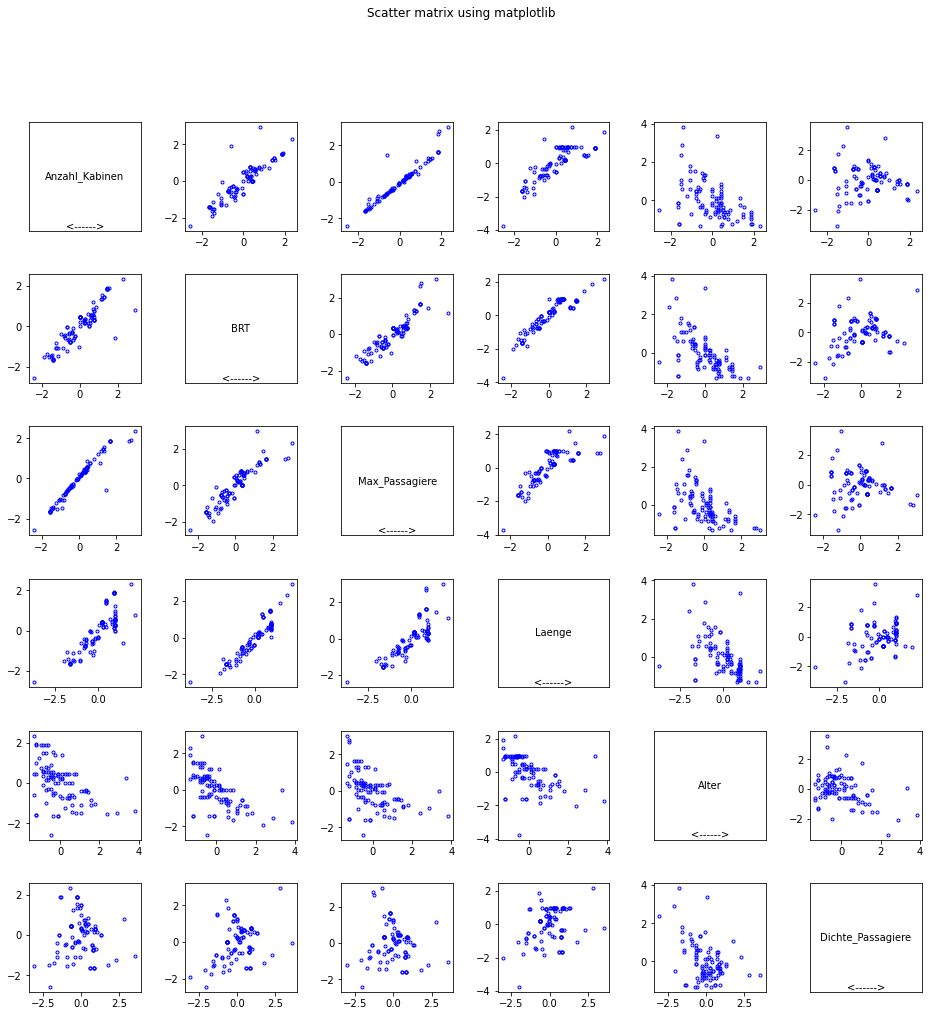

In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  # Zu dem Subset der Trainings-Eingabe-Daten den Scatter-Matrix-Plot ausgeben
  r,c = X_train_std.shape
  if c > 1 :   # Es werden wenigsten 2 Spalten verlangt ansonsten kann nicht geplottet werden
    fig = ml.scatterplot_matrix( X_train_std, 
                              cols_selected_X,
                              linestyle='none', marker='.', color='blue', mfc='none')
    fig.suptitle('Scatter matrix using matplotlib')
    plt.show()

###4b. Standardisieren der Ausgabedaten (Zielwerte)
Es ist nicht zwingend notwendig aber aus numerischen Gründen, also zu besseren Ausnutzung der zur Verfügung stehenden Zahlenauflösung, ist es sinnvoll auch die Ausgabegrößen zu standardisieren.
Wir stellen somit sicher, dass wir uns numerisch mit allen Daten "im Bereich relativ kleiner Zahlenwerte um den Nullpunkt herum bewegen.

In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  if STANDADISIERUNG_AUCH_DER_AUSGABEDATEN == 1:
    y_train_std, mean_y_train_col, standard_deviation_y_train_col = ml.standardisation_of_matrix_columns(y_train)
    y_test_std = ml.scale_of_matrix_columns(y_test, mean_y_train_col, standard_deviation_y_train_col)
    print(y_train_std.shape,y_test_std.shape, mean_y_train_col, standard_deviation_y_train_col)

  else:
    y_train_std = y_train
    y_test_std = y_test  


##5 Hauptkomponentenanalyse,  Selektion der zu berücksichtigenden Hauptkomponenten und Transformation der standardisierten Eingabedaten

###5a. Hauptkomponentenanalyse auf Basis der Singuläre Werte Zerlegung (SVT)


ACHTUNG: Die SVT setzt voraus, dass die uebergebene Matrix in jeder Spalte gleichantelsfrei ist. Dies überprüfen wir stichprobenartig vorher durch Sichtung noch einmalfür den Trainingsdatensatz (X_train, y_train).

In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 : 
  # Sichtung ob Spalte n eine Gleichanteil von 0 (bzw. wegen Rechenungenauigkeit einen sehr sehr kleinen Wert) und eine Varianz von 1 hat. 
  # Also auf den Exponenten achten.
  n = 0
  temp_mean_X = np.mean(X_train_std[:, n]) 
  temp_var_X = np.var(X_train_std[:, n])    
  temp_mean_y = np.mean(y_train_std[:, 0]) 
  temp_var_y = np.var(y_train_std[:, 0]) 

  print(temp_mean_X, temp_var_X, temp_mean_y, temp_var_y)


1.1220339078658498e-16 0.9999999999999999 10.950212765957449 8.068897827071075


In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  # Hauptkomponentenanalyse
  # Hierzu wird eine Singulare-Werte-Zerlegung (Singular Value Decomposing, SVD) durchgefuehrt.
  # Die Transformationsmatrix der SVD ist dabei die Transformationsmatrix der Hauptkomponetnentransformation
  # Die Rotationsmatrix ergibt sich als Vt.T also als Transponierte von Vt.
  U, s, Vt = np.linalg.svd(X_train_std) 
  print(Vt.T)


[[ 0.4607 -0.2591 -0.0252  0.5485 -0.6041  0.2329]
 [ 0.4866  0.0136 -0.1308  0.0112  0.6148  0.6065]
 [ 0.4627 -0.2957  0.0411  0.1838  0.3641 -0.7282]
 [ 0.4625  0.0300 -0.3653 -0.7263 -0.3401 -0.0924]
 [-0.3276 -0.4042 -0.8352  0.1517  0.0937 -0.0060]
 [ 0.1252  0.8252 -0.3868  0.3386 -0.0110 -0.1974]]


###5b. Selektion der zu berücksichtigenden Hauptkomponenten und Erzeugung der entsprechenden Matrix für die Rotation.

In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  anzahl_dimensionen = HAUPTKOMPONENTEN_DIMENSIONEN         # Bestimmung welche n ersten Dimensionen fuer die Dimensionsreduktion genommen werden sollen

  Wpca = Vt.T[ : , : anzahl_dimensionen]   # Die reduzierte Rotationsmatrix bestimmen, transponieren und in die Matrix W kopieren


Der erst in X_train_std stehen Merkmalsvektor wurde also wie folgt transformiert:

## 6 Hauptkomponententransformation

###6a. Transformation der Eingabedaten

In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  if HAUPTKOMPONENTENTRANSFORMATION == 1:
    X_train_reg = X_train_std.dot(Wpca)     # Die Trainigseingabedaten MUESSEN hier (also vor der Regression) schon transformiert werden
    X_test_reg  = X_test_std.dot(Wpca)      # Die Testeingabedaten werden sicherheitshalber (damit man es nicht vergisst) auch
                                            # hier schon transformiert.
  else:
    X_train_reg = X_train_std    
    X_test_reg  = X_test_std 
                                          

Der erst in X_train_std stehen Merkmalsvektor wurde also wie folgt transformiert:

In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  print("Merkmalsvektor OUT:",X_train_reg[0],"\n")
  print("Merkmalsvektor IN:",X_train_std[0],"\n")
  print("Wpca:\n", Wpca)

Merkmalsvektor OUT: [-2.4537  1.7844] 

Merkmalsvektor IN: [-1.6113 -1.4337 -1.5667 -1.6374 -1.2053  0.5879] 

Wpca:
 [[ 0.4607 -0.2591]
 [ 0.4866  0.0136]
 [ 0.4627 -0.2957]
 [ 0.4625  0.0300]
 [-0.3276 -0.4042]
 [ 0.1252  0.8252]]


**Man kann diese Transformation  so deuten dass jedes Element der ersten (n-ten) Spalte von Wpca bestimmt wie stark die Merkmale im IN-Vektor jeweils in das erste (n-te) Merkmal im OUT-Vektor eingehen.**

Diese Betrachtung lässt bei einigen Problemstellungen durchaus auch noch eine inhaltliche Interpretation der transformierten (OUT) Merkmale zu.

###6b. Sichtung der weiter verwendeten (ggf. transformierten) Eingabedaten
Hier werden die für die weiteren Berechnungen verwendeten Eingabedaten (Merkmale) noch einmal gesichtet. Diese sind ggf. hauptkomponententransformiert und selektiert. Eine direkte Bedeutung kann man den transformierten Merkmalen in der Regel nicht mehr zuordnen. Von daher ist diese Darstellung nur zur "Kontrolle" oder für "didaktische Zwecke" notwendig.

In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  # Da die Funktion ml.scatterplot_matrix() ein Array mit Beschriftungsstrings verlangt
  # und dessen Groesse die Anzahl der Sub-Plots bestimmt,
  # muss ein solches Array in passender  Groesse uebergeben werden.
  if HAUPTKOMPONENTENTRANSFORMATION == 1: 
    stringlaenge = HAUPTKOMPONENTEN_DIMENSIONEN 
  else :
    stringlaenge = np.size(SELEKTIERTE_MERKMALE)

  cols_b = np.chararray(stringlaenge,1)   # Ein Beschriftungsfeld mit anzahl_dimensionen String mit jeweils einem Zeichen anlegen.
  cols_b[:] = ' '                         # Das eine Zeichen ist dann ein Leerzeichen, so dass nichts sichtbares ausgegeben wird.

  if stringlaenge > 1 :   # Die Funktion scatterplot() verlangt wenigsten 2 Sub-Plots
    # Zu den nun ggf. standardisierten und hauptkomponenten-transformierten Daten den Scatter-Matrix-Plot ausgeben
    # Die Anzahl der Eintrage in cols_b bestimmt die Anzahl der Sup-Plots
    fig = ml.scatterplot_matrix( X_train_reg, 
                              cols_b,
                              linestyle='none', marker='.', color='blue', mfc='none')
    fig.suptitle('Scatter matrix using matplotlib')

    plt.show()


Die obige Scatter-Plot-Matrix ist ohne Bechriftung. In der Diagonalen müsste bei einer vorgenommenen Hauptkomponententransformation eigentlich (gemäß dem Vorlesungsskript) von oben links nach unten rechts folgendes stehen:
xt0, xt1, xt2 ... xtn.

Hierbei ist dann xt0 das wichtigste transformierte Merkmal und xtn das unwichtigste.

Bei den obigen Darstellungen findet rein grafisch eine Skalierung statt, denn es wird automatisch der jeweilige Wertebereich der Merkmale bestimmt und entsprechend "gezoomt".

Um eine besseren "optischen Eindruck" zu bekommen, wird in der folgenden Code-Zelle das Merkmal xt0 gegenüber dem Merkmal xt1 noch einmal aber denn ohne "Zoomen" dargestellt.


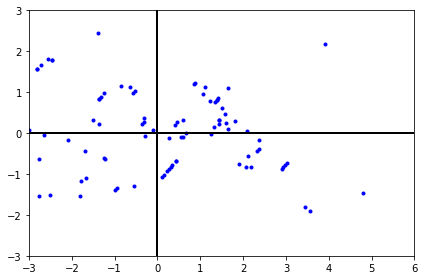

In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  # Und hier noch mal die Spalte 0 gegenüber der Spalte 1  aufgetragen und zwar mit geeigneter Skalierung
  # die eine leichte Wiedererkennen der Punktwolke ermoeglicht. Dies Wiedererkennen ist ja in der obigen Scattermatrix wegen der 
  # dort vorgenommenen Autonormierung leider nicht so leicht möglich.

  r,c = X_train_reg.shape
  if c > 1 :   # Es werden wenigsten 2 Spalten verlangt ansonsten kann nicht geplottet werden
    plt.scatter(X_train_reg[ : ,0],  X_train_reg[ : ,1], marker='.', color='blue')

    plt.hlines(y=0, xmin=-3, xmax=6, color='black', lw=2)
    plt.xlim([-3, 6])

    plt.vlines(x=0, ymin=-3, ymax=3, color='black', lw=2)
    plt.ylim([-3, 3])

    plt.tight_layout()
    plt.show()


##7 Training (Regression)

Als Vorhersage-Modell nehmen wir eine LINEARE Abhängigkeit an. Es ergibt sich dadurch das folgend überbestimmte Gleichungssystem mit d Dimensionen (d Merkmalen). Wir erhalten X des Gleichungssystems aus dem Trainingseingabedatensatz (X_train_reg) von n Merkmalsvektoren und y aus dem Trainingsausgabedatensatz y_train_std.

$$ w_0 X_{00} + w_1 X_{01} + ...  +  w_n X_{0d} = \hat{y}_0 \\
w_0 X_{10} + w_1 X_{11} + ...  + w_n X_{1d} = \hat{y}_1 \\
.. \\
w_0 X_{n0} + w_1 X_{n1} + ...  + w_n X_{nd} = \hat{y}_n $$

Als Optimierer-Modell wählen wir die Inverse-Matrix-Berechnung, d.h. wir lösen das Gleichungsystem unter Verwendung der inversen Matrix.

Im Rahmen der Regression wird der Vektor **W..** (als Matrix mit 3 Zeilen und einer Spalte) berechnet.

Wie man dem obigen Gleichungssystem ansieht erhaelt man bei Eingabe einen Merkmalsvektors X = 0 (der also aus lauter Nullen besteht) stets auch einen Ausgabevektor y = 0.

D.h. es lassen sich somit nur Geraden definieren die durch den Uraprung gehen.

Möchte man nun auch Geraden berücksichtigen die nicht durch den Ursprung gehen, so muss man die eigentlichen Merkmalsvektoren einfach nur um ein weiteres Merkmal mit dem festen Wert 1 erweitern. Diese "feste 1" wird Bias genannt. Das entsprechende Gleichungssystem ist dann wie folgt:

$$ w_0 X_{00} + w_1 X_{01} + ...  +  w_n X_{0d} +  w_{n+1} 1 = \hat{y}_0  \\
w_0 X_{10} + w_1 X_{11} + ...  + w_n X_{1d} +  w_{n+1} 1 = \hat{y}_1 \\
.. \\
w_0 X_{n0} + w_1 X_{n1} + ...  + w_n X_{nd} +  w_{n+1} 1 = \hat{y}_n $$

**Einen etwaigen Bias nun beruecksichtigen indem eine 1-Spalte an die Eingabedaten angehaenggt wird.**

In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  if BIAS_BERUECKSICHTIGEN == 1: 
    # Die Einsspalte fuer den Bias  hinzufuegen
    X_train_reg = ml.append_bias_column(X_train_reg)  
    X_test_reg = ml.append_bias_column(X_test_reg) 
      

###7a. Inverse-Matrix-Verfahren

Das Ergebnis dieser Berechnung ist (per Definition) das absolute Minimum (Rechenungenauigkeiten ausgeschlossen).

In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  W_IM = ml.linear_regression (X_train_reg,y_train_std)

  print("X_train_reg.shape:", X_train_reg.shape)
  print ("Gewichte fuer absolutes Minimum gemaess Inverse-Matrix-Verfahren: \n", W_IM)
  #print(W_IM.shape)


X_train_reg.shape: (94, 3)
Gewichte fuer absolutes Minimum gemaess Inverse-Matrix-Verfahren: 
 [[ 1.2652]
 [-0.3460]
 [ 10.9502]]


##8 Überprüfung der Lösungen anhand der Trainings- und Test-Daten


###8a. Berechnung der Vorhersagen (Ist-Ausgabedaten)


In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  # Ueberpruefung der Loesung aus dem Inverse-Matrix-Verfahren
  y_train_pred_IM = np.dot(X_train_reg, W_IM)
  y_test_pred_IM = np.dot(X_test_reg, W_IM)


###8b. Rück-Standardisieren der Ist-Ausgabedaten


In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  if STANDADISIERUNG_AUCH_DER_AUSGABEDATEN == 1:
    #Inverse-Matrix-Verfahren
    y_train_pred_stdback_IM = ml.restandardisation_of_matrix_columns(y_train_pred_IM, mean_y_train_col, standard_deviation_y_train_col )
    y_test_pred_stdback_IM  = ml.restandardisation_of_matrix_columns(y_test_pred_IM,  mean_y_train_col, standard_deviation_y_train_col )
    
  else:
    #Inverse-Matrix-Verfahren
    y_train_pred_stdback_IM = y_train_pred_IM
    y_test_pred_stdback_IM  = y_test_pred_IM


###8c. Berechnung des Fehlerquadrates (Mean-Square-Error, MSE)

Zu beachten ist hierbei, dass (auch bei deaktivierter Standardisierung und Hauptkomponententransformation) der MSE das Doppelte des Last-Loss aus dem Gradienteabstiegsverfahren ist.

In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  # Inverse-Matrix-Verfahren
  mse_test_IM = ml.mean_square_error_of_two_matrixes(y_test, y_test_pred_stdback_IM)   
  mse_train_IM = ml.mean_square_error_of_two_matrixes(y_train, y_train_pred_stdback_IM)

  print ("\n--------------------------------------------------------------------------")
  print ("Eingestellte Parameter der Datenvorverarbeitung ")
  print ("   SELEKTIERTE_MERKMALE:           ", SELEKTIERTE_MERKMALE)
  print ("   BIAS_BERUECKSICHTIGEN:          ", BIAS_BERUECKSICHTIGEN)
  print ("   STANDADISIERUNG:                ", STANDADISIERUNG)
  print ("   HAUPTKOMPONENTENTRANSFORMATION: ", HAUPTKOMPONENTENTRANSFORMATION)
  print ("   HAUPTKOMPONENTEN_DIMENSIONEN:   ", HAUPTKOMPONENTEN_DIMENSIONEN)

  print ("\nMSE bezueglich Trainingsdaten ")
  print ("   Inverse-Matrix-Verfahren:       ", mse_train_IM)

  print ("\nMSE bezueglich Testdaten ")
  print ("   Inverse-Matrix-Verfahren:    "  , mse_test_IM)



--------------------------------------------------------------------------
Eingestellte Parameter der Datenvorverarbeitung 
   SELEKTIERTE_MERKMALE:            ['Anzahl_Kabinen', 'BRT', 'Max_Passagiere', 'Laenge', 'Alter', 'Dichte_Passagiere']
   BIAS_BERUECKSICHTIGEN:           1
   STANDADISIERUNG:                 1
   HAUPTKOMPONENTENTRANSFORMATION:  1
   HAUPTKOMPONENTEN_DIMENSIONEN:    2

MSE bezueglich Trainingsdaten 
   Inverse-Matrix-Verfahren:        1.3996142848407773

MSE bezueglich Testdaten 
   Inverse-Matrix-Verfahren:     1.2285148680121496


Der in der obigen Code-Zelle berechnete Wert ist die Wurzel aus der Summe der Fehlerquadrate. Bei einem angenommenen Wert von 1,0 würde dies bedeuten, dass das System im Mittel quasi um ca. 100 Crew-Mitglieder falsch liegt.

###8d. Darstellung der Differenzen (Soll-Ausgabewert - Ist-Ausgabewert)

In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  plt.figure(figsize=(10, 3))  # Bestimmt die Groesse des Gesamtgrafik 
  
  # Inverse-Matrix-Verfahren
  plt.subplot(1, 2, 2)
  plt.scatter(y_train_pred_stdback_IM,  y_train_pred_stdback_IM - y_train,
              c='blue', marker='o', edgecolor='white',
              label='Trainingsdaten')
  plt.scatter(y_test_pred_stdback_IM,  y_test_pred_stdback_IM - y_test,
              c='red', marker='s', edgecolor='white',
              label='Testdaten')
  plt.xlabel('Vorhersagewerte Inverse-Matrix-Verfahren')
  plt.ylabel('Soll - Ist  der Vorhersagewerte')
  plt.legend(loc='lower right')
  plt.show()


###8e. Darstellung des Histrogramm zu den Fehlerbetraegen

In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  # Absolutfehler fuer alle Testeingabedaten berechnen
  diff_IM = np.abs(y_test_pred_stdback_IM - y_test)

  # Das Histogramm zu den Absolutfehler plottem
  anzahl_balken_im_histogramm = 30

  plt.figure(figsize=(10, 3))  # Bestimmt die Groesse des Gesamtgrafik 
  
  # Inverse-Matrix-Verfahren
  plt.subplot(1, 2, 2)
  plt.hist(diff_IM, bins = anzahl_balken_im_histogramm) 
  plt.xlabel("Differenzbetrag Inverse-Matrix-Verfahren")
  plt.ylabel("Anzahl")
  plt.show()


###8f. Auflistung:    Soll ,   Ist  ,   Soll-Ist

In [ ]:
if FLIPPED_CLASS_ROOM_PROJEKT_1 :
  diff_IM = y_test_pred_stdback_IM - y_test
  for i in range(y_test.shape[0]):
    print (y_test[i], y_test_pred_stdback_IM[i], diff_IM[i])

[ 12.0000] [ 11.8371] [-0.1629]
[ 10.9400] [ 11.1591] [ 0.2191]
[ 15.2000] [ 15.7901] [ 0.5901]
[ 14.0000] [ 14.2351] [ 0.2351]
[ 12.0000] [ 12.3972] [ 0.3972]
[ 15.0000] [ 15.4499] [ 0.4499]
[ 12.0000] [ 11.7129] [-0.2871]
[ 15.3800] [ 14.3608] [-1.0192]
[ 15.0000] [ 16.2156] [ 1.2156]
[ 14.0000] [ 14.2270] [ 0.2270]
[ 14.1000] [ 13.9299] [-0.1701]
[ 12.0000] [ 12.4301] [ 0.4301]
[ 6.7300] [ 6.9022] [ 0.1722]
[ 9.9600] [ 10.1770] [ 0.2170]
[ 8.2000] [ 8.5333] [ 0.3333]
[ 15.3800] [ 14.3608] [-1.0192]
[ 12.0000] [ 11.8214] [-0.1786]
[ 15.0000] [ 14.0689] [-0.9311]
[ 12.0000] [ 11.4918] [-0.5082]
[ 6.7300] [ 6.9066] [ 0.1766]
[ 4.4600] [ 4.8625] [ 0.4025]
[ 7.4500] [ 7.4006] [-0.0494]
[ 6.2400] [ 6.0011] [-0.2389]
[ 5.1100] [ 5.2361] [ 0.1261]
[ 7.4700] [ 6.9703] [-0.4997]
[ 14.8500] [ 15.9369] [ 1.0869]
[ 11.4800] [ 13.1882] [ 1.7082]
[ 9.7100] [ 10.0190] [ 0.3090]
[ 10.6000] [ 11.7592] [ 1.1592]
[ 14.7600] [ 15.9039] [ 1.1439]
[ 16.6000] [ 18.7855] [ 2.1855]
[ 10.6000] [ 11.7263] [ 1.

# **Aufgabe 1: Vorlage komprimieren mit PCA**
In dieser Aufgabe sollen Sie aus der Vorlage eine komprimierte Version erstellen, indem ausschliesslich die für das Einlesen, das Training und dessen Überprüfung benötigten Berechnungsschritte ausgeführt werden.<br>

Um diese Aufgabe zu lösen müssen Sie die in der Vorlage gemachten Berechnungen auf Code-Zellen (nicht Code-Zeilen-Ebene) verstanden haben. Sie können diese Teilaufgabe also im wesentlichen durch "Zusammenkopieren" von Code-Zellen lösen. <br>

Die für diese Aufgabe gemachten weiteren Einschränkungen sind wie folgt:
> 1.) Grafische Ausgaben entfallen generell. <br>
> 2.) Irgendwelche Analysen der Eingangsdaten entfallen <br>
> 3.) Es wird immer mit der PCA (also auch mit der Standardisierung der Eingabedaten) gearbeitet <br>
> 4.) Die Standardisierung der Ausgabedaten entfällt. <br>
> 5.) Als Parameter stehen nur folgende zur Verfuegung: <br>
> - Definition der zu verwendenden originalen Merkmale <br>
> - Dimension (Anzahl) der transformierten Merkmale die zur Regression genutzt werden sollen.
> 6.) Die beiden Parameter sollen so wie in der Vorlage definiert und verwendet werden.<br>
> 7.) Als Überprüfungsergebnis wird nur der MSE für die Trainings- und Test-Daten zusammen mit den verwendeten Parametern textuell ausgegeben. <br>
> 8.) Alle Berechnungen also auch das Einlesen der Daten und die Parametrierung finden ein einer einzigen Code-Zelle statt.<br>
> 9.) Zu Ihrem eigenen Vorteil sollen ALLE Variablen für die Zwischenergebnisse aus der Vorlage (also auch y_train_std, y_train, y_test_std,y_test ) erhalten bleiben. Zur Deaktivierung der Standardisierung der Ausgabedaten kann und soll dann nämlich recht einfach wie folgt erfolgen:<br>
> - y_train_std = y_train <br>
> - y_test_std  = y_test<br> 
Der Datenfluss wird somit so "umgeleitet" dass trotz Deaktivierung eines Berechnungsschrittes nachfolgende Code-Zeilen nicht angepasst werden müssen.
> 10.) Damit der Bezug zur Vorlage bei "Zusammenkopieren" nicht verloren geht, müssen Sie in den resultierenden Code entsprechende Kommentarzeilen mit Nummernangabe (entsprechend der Nummerierung in der Vorlage) einfügen .<br>


In [ ]:
if AUFGABE_1 :
  df = 0  
  #1 Daten einlesen, grob sichten und erste Korrelationsanalye
  # Einlesen der Daten
  df=pd.read_csv(BASEDIR + '/Data_Input/' + 'kreuzfahrtschiffe.csv')

  #==========================================================================================================================

  #1a Grobe Sichtung
  #entfällt da grafische Ausgaben entfallen

  #==========================================================================================================================

  #1b Korrelationsanalyse
  # Definition des Daten-Sub-Sets
  cols = [ 'Anzahl_Kabinen', 'BRT', 'Max_Passagiere', 'Laenge', 'Alter','Dichte_Passagiere', 'Anzahl_Crew_Mitglieder']
    
  # Konvertierung der Daten vom Pandas-DF-Format in das Numpy-Format
  X = ml.pandas_to_numpy_matrix(df, cols)

  # Normieren so dass je Spalte
  #   1.) Der Mittewert und die Standardabweichung (Wurzel aus Varianz) berechnet werden
  #   2.) Die Werte der Spalten mit deren Mittelwert (M) und Standardabweichung (S) wie folgt normiert werden Out = (In - M)/S
  mean_X_std_col = ml.get_functionvalue_of_matrix_columns(X,np.mean)
  standard_abweichung_col = ml.get_functionvalue_of_matrix_columns(X,np.std)

  X_std = ml.scale_of_matrix_columns(X, mean_X_std_col, standard_abweichung_col)

  #==========================================================================================================================
  

  #2PARAMETRIERUNG und Datenfluss der Berechnungen

  # Hier die Paramater gemaess den vorangestellten Erlaueterungen einstellen

  # Angeordnet nach Betrag der Korrelation mit "Anzahl_Crew_Mitglieder"
  # bezogen auf den GESAMTDATENSATZ. Die Reihenfolge aendert sich (zum Glueck) bei Trainingsdatensatz nicht.
  SELEKTIERTE_MERKMALE = [ 'Anzahl_Kabinen', 'BRT', 'Max_Passagiere', 'Laenge', 'Alter','Dichte_Passagiere']
  #SELEKTIERTE_MERKMALE = [ 'Anzahl_Kabinen', 'BRT', 'Max_Passagiere', 'Laenge', 'Alter']
  #SELEKTIERTE_MERKMALE = [ 'Anzahl_Kabinen', 'BRT', 'Max_Passagiere', 'Laenge']
  #SELEKTIERTE_MERKMALE = [ 'Anzahl_Kabinen', 'BRT', 'Max_Passagiere']
  #SELEKTIERTE_MERKMALE = [ 'Anzahl_Kabinen', 'BRT']
  #SELEKTIERTE_MERKMALE = [ 'Anzahl_Kabinen']

  BIAS_BERUECKSICHTIGEN =  1          # 1 =>  Die Eingabematrix X fuer das Inverse-Matrix-Verfahren
                                        #       wird um eine ganz rechte Spalte mit lauter EINSEN ergaenzt.
                                        #       Dadurch wird (ueber die Daten) ein Bias implementiert, der 
                                        #       zunaechst nicht beruecktsichtugt wurde. 
                      

  STANDADISIERUNG = 1                 # Spaltenweise (also je Merkmal) eine Standardisierung durchfuehren
                                        # ACHTUNG:  Wenn eine Standardisierung durchgefuehrt wird, dann muss der Bias nicht 
                                        #           explizit beruecksichtigt werden, da dies dann schon implizit mit der Standardisierung
                                        #           beruecksichtigt wird. Es schadet aber auch nicht wenn man den Bias trotzdem noch explizit
                                        #           beruecksichtigt.

  STANDADISIERUNG_AUCH_DER_AUSGABEDATEN = 0   # Optional kann man auch die Ausgabedaen noch standardisieren
                                              # um alle Daten dann numerisch guenstiger zu gestalten.

  HAUPTKOMPONENTENTRANSFORMATION = 1  # ACHTUNG: Wenn die Hauptkomponententransformation aktiviert wird, 
                                        # dann MUSS auch die Standardisierung aktiviert werden.

  HAUPTKOMPONENTEN_DIMENSIONEN = 2    # ACHTUNG:  Dieser Wert muss in folgendem Wertebereich liegen 
                                        #           1 < HAUPTKOMPONENTEN_DIMENSIONEN <= Anzahl Einträge in SELEKTIERTE_MERKMALE
                                        #           Grund: Man kann die Anzahl der aus der Hauptkoponententransformation
                                        #           zu verwendenten Merkmale nicht mit 5 definieren wenn in die Transformation nur 3
                                        #           originale Merkmale "hinein gegangen sind", denn es gehen dann auch maximal nur 3 heraus.

  #==========================================================================================================================
  
  #3 Aufteilung der Daten in einen Trainings- und Testdatensatz

  # Selektion der Merkmale die verwendet werden sollen
  cols_selected_X = SELEKTIERTE_MERKMALE

  # Formale Selektion der Zielwerte. Dies ist immer "Anzahl_Crew_Mitglieder" bei unserer Aufgabenstellung
  cols_selected_y = ['Anzahl_Crew_Mitglieder']

  # Erzeugung der entsprechende NumPy-Matrizen
  X = ml.pandas_to_numpy_matrix(df, cols_selected_X) # Merkmal-Matrix
  y = ml.pandas_to_numpy_matrix(df, cols_selected_y) # Zielwert-Matrix


  # Aufteilung der selektierten Daten in Trainings- und Test-Datensätze
  # 60% gehen in den Trainingsdatensatz, 40% in den Testdatensatz und der Rest (in diesem Fall 0%) in den Validierungsdatensatz
  # Damit die Signatur der Funktion erfuellt wird muessen fuer den Validierungsdatensatz dummy_1 und dummy_2 angegeben werden.
  X_train, X_test, dummy_1, y_train, y_test, dummy_2  = ml.split_matrix_horizontal(X, y , percent_train=60, percent_test=40)

  
  #print(X_train.shape,X_test.shape, y_train.shape,y_test.shape, cols_selected_X)
  #Ausgabe hier entfällt nach Aufgabenstellung
  

  # Definition des Daten-Sub-Sets, also der Daten zu der die Kovarianzmatrix bestimmt werden soll 
  #cols_Xy = [ 'BRT','Max_Passagiere', 'Alter','Laenge', 'Anzahl_Kabinen','Dichte_Passagiere','Anzahl_Crew_Mitglieder']
  cols_Xy = np.hstack ((cols_selected_X,cols_selected_y))

  # Zusammenfuehren von X_train und y_train in eine Matrix Xy und fuer diese Matrix die Korrelationen bestimmen
  Xy_train = np.hstack((X_train, y_train))


  mean_Xy_std_col =  ml.get_functionvalue_of_matrix_columns(Xy_train,np.mean)
  standard_abweichung_Xy_col =  ml.get_functionvalue_of_matrix_columns(Xy_train,np.std)

  Xy_std = ml.scale_of_matrix_columns(Xy_train, mean_Xy_std_col, standard_abweichung_Xy_col)

  # Die Kovarianzmatrix der standardisierten Merkmale berechnen und als Heatmap ausgeben
  cov_mat_Xy = ml.covariance_matrix(Xy_std) # Kovarianzmatrix berechnen

  #Die rudimentaere Ausgabe der Kovarianz entfaellt gemaeß der Aufgabenstellung

#==========================================================================================================================

  #4a Standardisieren der Trainingseingabedaten (Merkmalsvektoren)
  
  if STANDADISIERUNG == 1:
    X_train_std, mean_X_train_col, standard_deviation_X_train_col = ml.standardisation_of_matrix_columns(X_train)
    X_test_std = ml.scale_of_matrix_columns(X_test, mean_X_train_col, standard_deviation_X_train_col)

  else:
    X_train_std = X_train
    X_test_std = X_test

  #Scatter-Matrix-Plot aus 4a entfällt gemaeß der Aufgabenstellung

  #==========================================================================================================================

  #4b Standardisieren der Ausgabedaten (Zielwerte)
  #Unterpunkt 9
  if STANDADISIERUNG_AUCH_DER_AUSGABEDATEN == 1:
    y_train_std, mean_y_train_col, standard_deviation_y_train_col = ml.standardisation_of_matrix_columns(y_train)
    y_test_std = ml.scale_of_matrix_columns(y_test, mean_y_train_col, standard_deviation_y_train_col)

    #print(y_train_std.shape,y_test_std.shape, mean_y_train_col, standard_deviation_y_train_col)
    #Ausgabe der Kovarianz entfaellt gemaeß der Aufgabenstellung

  else:
    y_train_std = y_train
    y_test_std = y_test  
  
  #==========================================================================================================================
  #5 Hauptkomponentenanalyse, Selektion der zu berücksichtigenden Hauptkomponenten und Transformation der standardisierten Eingabedaten

  #5a Hauptkomponentenanalyse auf Basis der Singuläre Werte Zerlegung (SVT)

  # Sichtung ob Spalte n eine Gleichanteil von 0 (bzw. wegen Rechenungenauigkeit einen sehr sehr kleinen Wert) und eine Varianz von 1 hat. 
  # Also auf den Exponenten achten.
  #n = 0
  #temp_mean_X = np.mean(X_train_std[:, n]) 
  #temp_var_X = np.var(X_train_std[:, n])    
  #temp_mean_y = np.mean(y_train_std[:, 0]) 
  #temp_var_y = np.var(y_train_std[:, 0]) 

  #print(temp_mean_X, temp_var_X, temp_mean_y, temp_var_y)
  #Ausgabe der Sichtung des Gleichanteils entfaellt gemaeß der Aufgabenstellung


  # Hauptkomponentenanalyse
  # Hierzu wird eine Singulare-Werte-Zerlegung (Singular Value Decomposing, SVD) durchgefuehrt.
  # Die Transformationsmatrix der SVD ist dabei die Transformationsmatrix der Hauptkomponetnentransformation
  # Die Rotationsmatrix ergibt sich als Vt.T also als Transponierte von Vt.
  U, s, Vt = np.linalg.svd(X_train_std) 
  #print(Vt.T)
  #Ausgabe einfaellt 

  #==========================================================================================================================
  #5b Selektion der zu berücksichtigenden Hauptkomponenten und Erzeugung der entsprechenden Matrix für die Rotation.

  anzahl_dimensionen = HAUPTKOMPONENTEN_DIMENSIONEN         # Bestimmung welche n ersten Dimensionen fuer die Dimensionsreduktion genommen werden sollen

  Wpca = Vt.T[ : , : anzahl_dimensionen]   # Die reduzierte Rotationsmatrix bestimmen, transponieren und in die Matrix W kopieren

  #==========================================================================================================================
  #6 Hauptkomponententransformation

  #6a Transformation der Eingabedaten
  if HAUPTKOMPONENTENTRANSFORMATION == 1:
    X_train_reg = X_train_std.dot(Wpca)     # Die Trainigseingabedaten MUESSEN hier (also vor der Regression) schon transformiert werden
    X_test_reg  = X_test_std.dot(Wpca)      # Die Testeingabedaten werden sicherheitshalber (damit man es nicht vergisst) auch
                                            # hier schon transformiert.
  else:
    X_train_reg = X_train_std    
    X_test_reg  = X_test_std 


  #print("Merkmalsvektor OUT:",X_train_reg[0],"\n")
  #print("Merkmalsvektor IN:",X_train_std[0],"\n")
  #print("Wpca:\n", Wpca)
  #Ausgabe entfaellt 

  #==========================================================================================================================
  #6b Sichtung der weiter verwendeten (ggf. transformierten) Eingabedaten
  #Ausgabe entfaellt


  #==========================================================================================================================
  #7 Training (Regression)

  if BIAS_BERUECKSICHTIGEN == 1: 
    # Die Einsspalte fuer den Bias  hinzufuegen
    X_train_reg = ml.append_bias_column(X_train_reg)  
    X_test_reg = ml.append_bias_column(X_test_reg) 

  #==========================================================================================================================
  #7a Inverse-Matrix-Verfahren
    W_IM = ml.linear_regression (X_train_reg,y_train_std)

    #print("X_train_reg.shape:", X_train_reg.shape)
    #print ("Gewichte fuer absolutes Minimum gemaess Inverse-Matrix-Verfahren: \n", W_IM)
    #print(W_IM.shape)
    #Ausgaben entfallen


  #==========================================================================================================================
  #8 Überprüfung der Lösungen anhand der Trainings- und Test-Daten
  
  #8a Berechnung der Vorhersagen (Ist-Ausgabedaten)
  # Ueberpruefung der Loesung aus dem Inverse-Matrix-Verfahren
  y_train_pred_IM = np.dot(X_train_reg, W_IM)
  y_test_pred_IM = np.dot(X_test_reg, W_IM)

  #==========================================================================================================================
  #8b Rück-Standardisieren der Ist-Ausgabedaten
  if STANDADISIERUNG_AUCH_DER_AUSGABEDATEN == 1:
    #Inverse-Matrix-Verfahren
    y_train_pred_stdback_IM = ml.restandardisation_of_matrix_columns(y_train_pred_IM, mean_y_train_col, standard_deviation_y_train_col )
    y_test_pred_stdback_IM  = ml.restandardisation_of_matrix_columns(y_test_pred_IM,  mean_y_train_col, standard_deviation_y_train_col )
    
  else:
    #Inverse-Matrix-Verfahren
    y_train_pred_stdback_IM = y_train_pred_IM
    y_test_pred_stdback_IM  = y_test_pred_IM

  #==========================================================================================================================
  #8c
  # Inverse-Matrix-Verfahren
  mse_test_IM = ml.mean_square_error_of_two_matrixes(y_test, y_test_pred_stdback_IM)   
  mse_train_IM = ml.mean_square_error_of_two_matrixes(y_train, y_train_pred_stdback_IM)

  print ("\n--------------------------------------------------------------------------")
  print ("Eingestellte Parameter der Datenvorverarbeitung ")
  print ("   SELEKTIERTE_MERKMALE:           ", SELEKTIERTE_MERKMALE)
  print ("   BIAS_BERUECKSICHTIGEN:          ", BIAS_BERUECKSICHTIGEN)
  print ("   STANDADISIERUNG:                ", STANDADISIERUNG)
  print ("   HAUPTKOMPONENTENTRANSFORMATION: ", HAUPTKOMPONENTENTRANSFORMATION)
  print ("   HAUPTKOMPONENTEN_DIMENSIONEN:   ", HAUPTKOMPONENTEN_DIMENSIONEN)

  print ("\nMSE bezueglich Trainingsdaten ")
  print ("   Inverse-Matrix-Verfahren:       ", mse_train_IM)

  print ("\nMSE bezueglich Testdaten ")
  print ("   Inverse-Matrix-Verfahren:    "  , mse_test_IM)

  #Weitere Ausgaben aus
  #8d Darstellung der Differenzen (Soll-Ausgabewert - Ist-Ausgabewert)
  #8e Darstellung des Histrogramm zu den Fehlerbetraegen
  #8f Auflistung: Soll , Ist , Soll-Ist
  #enfallen gemaeß der Aufgabenstellung


--------------------------------------------------------------------------
Eingestellte Parameter der Datenvorverarbeitung 
   SELEKTIERTE_MERKMALE:            ['Anzahl_Kabinen', 'BRT', 'Max_Passagiere', 'Laenge', 'Alter', 'Dichte_Passagiere']
   BIAS_BERUECKSICHTIGEN:           1
   STANDADISIERUNG:                 1
   HAUPTKOMPONENTENTRANSFORMATION:  1
   HAUPTKOMPONENTEN_DIMENSIONEN:    2

MSE bezueglich Trainingsdaten 
   Inverse-Matrix-Verfahren:        1.3996142848407773

MSE bezueglich Testdaten 
   Inverse-Matrix-Verfahren:     1.2285148680121496


# **Aufgabe 2: Deaktivierung der PCA**
In dieser Aufgabe sollen Sie eine Kopie der Code-Zelle von Aufgabe 1 erstellen und diese so abwandeln, dass keine Hauptkomponententransformation mehr durchgeführt wird.<br>

Die für diese Aufgabe gemachten weiteren Einschränkungen leiten sich direkt aus denen der Aufgabe 1 ab und sind wie folgt:
> 1.) Grafische Ausgaben entfallen generell. <br>
> 2.) Irgendwelche Analysen der Eingangsdaten entfallen <br>
> 3.) Es wird NICHT mit der PCA aber WEITERHIN mit der Standardisierung der Eingabedaten gearbeitet <br>
> 4.) Die Standardisierung der Ausgabedaten entfällt <br>
> 5.) Als einziger Parameter bleibt somit die Folgender: <br>
> - Definition der zu verwendenden originalen Merkmale <br>
> 6.) Der Parameter soll so wie in der Vorlage definiert und verwendet werden.<br>
> 7.) Als Überprüfungsergebnis wird nur der MSE für die Trainings- und Test-Daten zusammen mit den verwendeten Parametern textuell ausgegeben. <br>
> 8.) Alle Berechnungen also auch das Einlesen der Daten und die Parametrierung finden ein einer einzigen Code-Zelle statt.<br>
> 9.) ALLE Variablen für die Zwischenergebnisse aus der Vorlage sollen erhalten bleiben. Bei der Deaktivierung der mit der PCA verbundenen Berechnungen kann und soll der Datenfluss analog zum Punkt 9 aus der Aufgabe 1 umgeleitet werden, so dass nachfolgende Code-Zeilen nicht angepasst werden müssen.
> 10.) Die  Kommentarzeilen mit Nummernangabe (entsprechend der Nummerierung in der Vorlage) sollen erhalten bleiben .<br>

In [ ]:
if AUFGABE_2 :
  df = 0  
  #1
  # Einlesen der Daten
  df=pd.read_csv(BASEDIR + '/Data_Input/' + 'kreuzfahrtschiffe.csv')

  #==========================================================================================================================

  #1a einfällt da grafische Ausgaben entfallen

  #==========================================================================================================================

  #1b Korrelationsanalyse
  # Definition des Daten-Sub-Sets
  cols = [ 'Anzahl_Kabinen', 'BRT', 'Max_Passagiere', 'Laenge', 'Alter','Dichte_Passagiere', 'Anzahl_Crew_Mitglieder']
    
  # Konvertierung der Daten vom Pandas-DF-Format in das Numpy-Format
  X = ml.pandas_to_numpy_matrix(df, cols)

  # Normieren so dass je Spalte
  #   1.) Der Mittewert und die Standardabweichung (Wurzel aus Varianz) berechnet werden
  #   2.) Die Werte der Spalten mit deren Mittelwert (M) und Standardabweichung (S) wie folgt normiert werden Out = (In - M)/S
  mean_X_std_col = ml.get_functionvalue_of_matrix_columns(X,np.mean)
  standard_abweichung_col = ml.get_functionvalue_of_matrix_columns(X,np.std)

  X_std = ml.scale_of_matrix_columns(X, mean_X_std_col, standard_abweichung_col)

  #==========================================================================================================================
  

  #2 PARAMETRIERUNG und Datenfluss der Berechnungen

  # Hier die Paramater gemaess den vorangestellten Erlaueterungen einstellen

  # Angeordnet nach Betrag der Korrelation mit "Anzahl_Crew_Mitglieder"
  # bezogen auf den GESAMTDATENSATZ. Die Reihenfolge aendert sich (zum Glueck) bei Trainingsdatensatz nicht.
  SELEKTIERTE_MERKMALE = [ 'Anzahl_Kabinen', 'BRT', 'Max_Passagiere', 'Laenge', 'Alter','Dichte_Passagiere']
  #SELEKTIERTE_MERKMALE = [ 'Anzahl_Kabinen', 'BRT', 'Max_Passagiere', 'Laenge', 'Alter']
  #SELEKTIERTE_MERKMALE = [ 'Anzahl_Kabinen', 'BRT', 'Max_Passagiere', 'Laenge']
  #SELEKTIERTE_MERKMALE = [ 'Anzahl_Kabinen', 'BRT', 'Max_Passagiere']
  #SELEKTIERTE_MERKMALE = [ 'Anzahl_Kabinen', 'BRT']
  #SELEKTIERTE_MERKMALE = [ 'Anzahl_Kabinen']
  #SELEKTIERTE_MERKMALE = [ 'Anzahl_Kabinen','Laenge', 'Alter']

  BIAS_BERUECKSICHTIGEN =  1          # 1 =>  Die Eingabematrix X fuer das Inverse-Matrix-Verfahren
                                        #       wird um eine ganz rechte Spalte mit lauter EINSEN ergaenzt.
                                        #       Dadurch wird (ueber die Daten) ein Bias implementiert, der 
                                        #       zunaechst nicht beruecktsichtugt wurde. 
                      

  STANDADISIERUNG = 1                 # Spaltenweise (also je Merkmal) eine Standardisierung durchfuehren
                                        # ACHTUNG:  Wenn eine Standardisierung durchgefuehrt wird, dann muss der Bias nicht 
                                        #           explizit beruecksichtigt werden, da dies dann schon implizit mit der Standardisierung
                                        #           beruecksichtigt wird. Es schadet aber auch nicht wenn man den Bias trotzdem noch explizit
                                        #           beruecksichtigt.

  STANDADISIERUNG_AUCH_DER_AUSGABEDATEN = 0 # Optional kann man auch die Ausgabedaen noch standardisieren
                                              # um alle Daten dann numerisch guenstiger zu gestalten.

  HAUPTKOMPONENTENTRANSFORMATION = 0  # ACHTUNG: Wenn die Hauptkomponententransformation aktiviert wird, 
                                        # dann MUSS auch die Standardisierung aktiviert werden.

  HAUPTKOMPONENTEN_DIMENSIONEN = 2    # ACHTUNG:  Dieser Wert muss in folgendem Wertebereich liegen 
                                        #           1 < HAUPTKOMPONENTEN_DIMENSIONEN <= Anzahl Einträge in SELEKTIERTE_MERKMALE
                                        #           Grund: Man kann die Anzahl der aus der Hauptkoponententransformation
                                        #           zu verwendenten Merkmale nicht mit 5 definieren wenn in die Transformation nur 3
                                        #           originale Merkmale "hinein gegangen sind", denn es gehen dann auch maximal nur 3 heraus.

  #==========================================================================================================================
  
  #3 Aufteilung der Daten in einen Trainings- und Testdatensatz

  # Selektion der Merkmale die verwendet werden sollen
  cols_selected_X = SELEKTIERTE_MERKMALE

  # Formale Selektion der Zielwerte. Dies ist immer "Anzahl_Crew_Mitglieder" bei unserer Aufgabenstellung
  cols_selected_y = ['Anzahl_Crew_Mitglieder']

  # Erzeugung der entsprechende NumPy-Matrizen
  X = ml.pandas_to_numpy_matrix(df, cols_selected_X) # Merkmal-Matrix
  y = ml.pandas_to_numpy_matrix(df, cols_selected_y) # Zielwert-Matrix


  # Aufteilung der selektierten Daten in Trainings- und Test-Datensätze
  # 60% gehen in den Trainingsdatensatz, 40% in den Testdatensatz und der Rest (in diesem Fall 0%) in den Validierungsdatensatz
  # Damit die Signatur der Funktion erfuellt wird muessen fuer den Validierungsdatensatz dummy_1 und dummy_2 angegeben werden.
  X_train, X_test, dummy_1, y_train, y_test, dummy_2  = ml.split_matrix_horizontal(X, y , percent_train=60, percent_test=40)

  
  #print(X_train.shape,X_test.shape, y_train.shape,y_test.shape, cols_selected_X)
  #Ausgabe hier entfällt nach Aufgabenstellung
  

  # Definition des Daten-Sub-Sets, also der Daten zu der die Kovarianzmatrix bestimmt werden soll 
  #cols_Xy = [ 'BRT','Max_Passagiere', 'Alter','Laenge', 'Anzahl_Kabinen','Dichte_Passagiere','Anzahl_Crew_Mitglieder']
  cols_Xy = np.hstack ((cols_selected_X,cols_selected_y))

  # Zusammenfuehren von X_train und y_train in eine Matrix Xy und fuer diese Matrix die Korrelationen bestimmen
  Xy_train = np.hstack((X_train, y_train))


  mean_Xy_std_col =  ml.get_functionvalue_of_matrix_columns(Xy_train,np.mean)
  standard_abweichung_Xy_col =  ml.get_functionvalue_of_matrix_columns(Xy_train,np.std)

  Xy_std = ml.scale_of_matrix_columns(Xy_train, mean_Xy_std_col, standard_abweichung_Xy_col)

  
  #Die Kovarianzmatrix der standardisierten Merkmale berechnen und als Heatmap ausgeben
  #PCA entfaellt! Std. nicht!
  #cov_mat_Xy = ml.covariance_matrix(Xy_std) # Kovarianzmatrix berechnen
  

  #Die rudimentaere Ausgabe der Kovarianz entfaellt gemaeß der Aufgabenstellung

#==========================================================================================================================

  #4a Standardisieren der Trainingseingabedaten (Merkmalsvektoren)
  
  if STANDADISIERUNG == 1:
    X_train_std, mean_X_train_col, standard_deviation_X_train_col = ml.standardisation_of_matrix_columns(X_train)
    X_test_std = ml.scale_of_matrix_columns(X_test, mean_X_train_col, standard_deviation_X_train_col)

  else:
    X_train_std = X_train
    X_test_std = X_test

  #Scatter-Matrix-Plot aus 4a entfällt gemaeß der Aufgabenstellung

  #==========================================================================================================================

  #4b Standardisieren der Ausgabedaten (Zielwerte)

  if STANDADISIERUNG_AUCH_DER_AUSGABEDATEN == 1:
    y_train_std, mean_y_train_col, standard_deviation_y_train_col = ml.standardisation_of_matrix_columns(y_train)
    y_test_std = ml.scale_of_matrix_columns(y_test, mean_y_train_col, standard_deviation_y_train_col)

    #print(y_train_std.shape,y_test_std.shape, mean_y_train_col, standard_deviation_y_train_col)
    #Ausgabe der Kovarianz entfaellt gemaeß der Aufgabenstellung

  else:
    y_train_std = y_train
    y_test_std = y_test  
  
  #==========================================================================================================================
  #5 Hauptkomponentenanalyse, Selektion der zu berücksichtigenden Hauptkomponenten und Transformation der standardisierten Eingabedaten

  #5a Hauptkomponentenanalyse auf Basis der Singuläre Werte Zerlegung (SVT)

  # Sichtung ob Spalte n eine Gleichanteil von 0 (bzw. wegen Rechenungenauigkeit einen sehr sehr kleinen Wert) und eine Varianz von 1 hat. 
  # Also auf den Exponenten achten.
  #n = 0
  #temp_mean_X = np.mean(X_train_std[:, n]) 
  #temp_var_X = np.var(X_train_std[:, n])    
  #temp_mean_y = np.mean(y_train_std[:, 0]) 
  #temp_var_y = np.var(y_train_std[:, 0]) 

  #print(temp_mean_X, temp_var_X, temp_mean_y, temp_var_y)
  #Ausgabe der Sichtung des Gleichanteils entfaellt gemaeß der Aufgabenstellung


  # Hauptkomponentenanalyse
  # Hierzu wird eine Singulare-Werte-Zerlegung (Singular Value Decomposing, SVD) durchgefuehrt.
  # Die Transformationsmatrix der SVD ist dabei die Transformationsmatrix der Hauptkomponetnentransformation
  # Die Rotationsmatrix ergibt sich als Vt.T also als Transponierte von Vt.
  U, s, Vt = np.linalg.svd(X_train_std) 
  #print(Vt.T)
  #Ausgabe einfaellt 

  #==========================================================================================================================
  #5b Selektion der zu berücksichtigenden Hauptkomponenten und Erzeugung der entsprechenden Matrix für die Rotation.

  anzahl_dimensionen = HAUPTKOMPONENTEN_DIMENSIONEN         # Bestimmung welche n ersten Dimensionen fuer die Dimensionsreduktion genommen werden sollen

  Wpca = Vt.T[ : , : anzahl_dimensionen]   # Die reduzierte Rotationsmatrix bestimmen, transponieren und in die Matrix W kopieren

  #==========================================================================================================================
  #6 Hauptkomponententransformation

  #6a Transformation der Eingabedaten
  if HAUPTKOMPONENTENTRANSFORMATION == 1:
    X_train_reg = X_train_std.dot(Wpca)     # Die Trainigseingabedaten MUESSEN hier (also vor der Regression) schon transformiert werden
    X_test_reg  = X_test_std.dot(Wpca)      # Die Testeingabedaten werden sicherheitshalber (damit man es nicht vergisst) auch
                                            # hier schon transformiert.
  else:
    X_train_reg = X_train_std    
    X_test_reg  = X_test_std 


  #print("Merkmalsvektor OUT:",X_train_reg[0],"\n")
  #print("Merkmalsvektor IN:",X_train_std[0],"\n")
  #print("Wpca:\n", Wpca)
  #Ausgabe entfaellt 

  #==========================================================================================================================
  #6b Sichtung der weiter verwendeten (ggf. transformierten) Eingabedaten
  #Ausgabe entfaellt


  #==========================================================================================================================
  #7 Training (Regression)

  if BIAS_BERUECKSICHTIGEN == 1: 
    # Die Einsspalte fuer den Bias  hinzufuegen
    X_train_reg = ml.append_bias_column(X_train_reg)  
    X_test_reg = ml.append_bias_column(X_test_reg) 

  #==========================================================================================================================
  #7a Inverse-Matrix-Verfahren
    W_IM = ml.linear_regression (X_train_reg,y_train_std)

    #print("X_train_reg.shape:", X_train_reg.shape)
    #print ("Gewichte fuer absolutes Minimum gemaess Inverse-Matrix-Verfahren: \n", W_IM)
    #print(W_IM.shape)
    #Ausgaben entfallen


  #==========================================================================================================================
  #8 Überprüfung der Lösungen anhand der Trainings- und Test-Daten
  
  #8a Berechnung der Vorhersagen (Ist-Ausgabedaten)
  # Ueberpruefung der Loesung aus dem Inverse-Matrix-Verfahren
  y_train_pred_IM = np.dot(X_train_reg, W_IM)
  y_test_pred_IM = np.dot(X_test_reg, W_IM)

  #==========================================================================================================================
  #8b Rück-Standardisieren der Ist-Ausgabedaten
  if STANDADISIERUNG_AUCH_DER_AUSGABEDATEN == 1:
    #Inverse-Matrix-Verfahren
    y_train_pred_stdback_IM = ml.restandardisation_of_matrix_columns(y_train_pred_IM, mean_y_train_col, standard_deviation_y_train_col )
    y_test_pred_stdback_IM  = ml.restandardisation_of_matrix_columns(y_test_pred_IM,  mean_y_train_col, standard_deviation_y_train_col )
    
  else:
    #Inverse-Matrix-Verfahren
    y_train_pred_stdback_IM = y_train_pred_IM
    y_test_pred_stdback_IM  = y_test_pred_IM

  #==========================================================================================================================
  #8c
  # Inverse-Matrix-Verfahren
  mse_test_IM = ml.mean_square_error_of_two_matrixes(y_test, y_test_pred_stdback_IM)   
  mse_train_IM = ml.mean_square_error_of_two_matrixes(y_train, y_train_pred_stdback_IM)

  print ("\n--------------------------------------------------------------------------")
  print ("Eingestellte Parameter der Datenvorverarbeitung ")
  print ("   SELEKTIERTE_MERKMALE:           ", SELEKTIERTE_MERKMALE)
  print ("   BIAS_BERUECKSICHTIGEN:          ", BIAS_BERUECKSICHTIGEN)
  print ("   STANDADISIERUNG:                ", STANDADISIERUNG)
  print ("   HAUPTKOMPONENTENTRANSFORMATION: ", HAUPTKOMPONENTENTRANSFORMATION)
  print ("   HAUPTKOMPONENTEN_DIMENSIONEN:   ", HAUPTKOMPONENTEN_DIMENSIONEN)

  print ("\nMSE bezueglich Trainingsdaten ")
  print ("   Inverse-Matrix-Verfahren:       ", mse_train_IM)

  print ("\nMSE bezueglich Testdaten ")
  print ("   Inverse-Matrix-Verfahren:    "  , mse_test_IM)

  #Weitere Ausgaben aus
  #8d Darstellung der Differenzen (Soll-Ausgabewert - Ist-Ausgabewert)
  #8e Darstellung des Histrogramm zu den Fehlerbetraegen
  #8f Auflistung: Soll , Ist , Soll-Ist
  #enfallen gemaeß der Aufgabenstellung


--------------------------------------------------------------------------
Eingestellte Parameter der Datenvorverarbeitung 
   SELEKTIERTE_MERKMALE:            ['Anzahl_Kabinen', 'BRT', 'Max_Passagiere', 'Laenge', 'Alter', 'Dichte_Passagiere']
   BIAS_BERUECKSICHTIGEN:           1
   STANDADISIERUNG:                 1
   HAUPTKOMPONENTENTRANSFORMATION:  0
   HAUPTKOMPONENTEN_DIMENSIONEN:    2

MSE bezueglich Trainingsdaten 
   Inverse-Matrix-Verfahren:        1.0098806629923205

MSE bezueglich Testdaten 
   Inverse-Matrix-Verfahren:     1.1318782312750744


# **Aufgabe 3: Sichtung und Analyse der Daten zu einer neuen Problemstellung**
In dieser Aufgabe sollen Sie die Daten für die Problemstellung "Qualitätsbestimmung" von Rotwein einlesen und analog zu der Vorlage analysieren.

Hierzu können Sie Teile der Vorlage ohne irgendwelche weiteren Einschränkung hierhin kopieren und ensprechend anpassen.

Die Daten werden Ihnen in Form der Pandas-CSV-Datei "rotweinqualitaet.csv" zur Verfügung gestellt. Zur Verwendung muss diese auch nach "Data_Input" kopiert werden. 

In den ersten Spalten der CSV-Datei stehen die verschiedenen Merkmale; in der letzten eine von Experten vergebene "Qualitätsnote". Hierzu sollten die Experten einen Note zwischen 1 (schlechteste) und 10 (Bestnote) vergeben.

Beschreiben Sie in der Text-Zelle "Ergebnisse zu Aufgabe 3" die Ergebnisse Ihrer Analyse. Gehen Sie dabei besonders auf eine mögliche "Wichtigkeit" der verschiedenen Merkmale für die Bestimmung der "Qualitätsnote" und eventuellen deutlichen Abhängigkeiten zwischen den Merkmalen selbst ein. Beachten Sie insbesondere auch die Verteilung der "Qualitätsnoten".


## Ergebnisse zu Aufgabe 3
Aus der Matrix zu entnehmen sind die stärksten Abhängigkeiten:

'alkohol' ==> qualitaets_note : 0.48

'freie_saeure' ==> qualitaets_note : -0,39

'sulfate' ==> qualitaets_note : 0.25

====================================================

'gebundener_saeure' ==> 'zitronen_saeure' : 0.67

'gebundene_sauere' ==> 'freie_saeure' : -0,26

Diese Eigenschaften scheinen untereinander eine Abhängigkeit zu beistzen,
da jedoch der Einfluss der 'freie_saeure' auf die 'qualitaets_note' mit -0,39 einen höheren Wert darsetellt, als auf die 'gebundener_saeure' mit 0.12 ist die 'freie_saeure' das stärkere Merkmal.
Zudem:

'gebundene_saeure' ==> 'ph_wert' : -0.68<br>
'zitronen_saeure' ==> 'ph_wert' : -0.54

Hierbei lässt sich schlussfolgern, dass beide "Arten" der Saeure einen direkten Einfluss auf den 'ph_wert' haben, dabei ist jedoch zu beachten dass der 'ph_wert' keinen wirklichen Einfluss auf die Bewertung der 'qualitäts_note' darstellt:
 'ph_wert' ==> 'qualitaets_note' : -0.06.


'gesamt_schwefeldioxid' ==> 'freies_schwefeldioxid' : 0.67 <br>
Dieser Zusammenhang scheint jedoch trivial, bringt auch keine Erkenntnis, da die Auswirkung auf die 'qualitaets_note' mit -0.05 bzw. -0.19 recht gering ausfallen.


Da scheinbar kaum oder kein Zusammenhang zwischen den übrigen Mermalen besteht, werden diese nicht beachtet.
z.B.am wenigstens Aussagekraft haben laut den Balkendiagrammen und der Scatter-Matrix der 'restzucker'.
Beim 'restzucker' befinden sich die Großzahl der Werte um den Wert 2(Balken-Diagramm), jedoch laesst sich hier nur die Aussage über die Auswirkung von 'restzucker' auf die 'qualitaets_note' treffen: dass sowohl gut bewerete, als auch schlecht bewertete diesen Wert inne haben, somit ergibt sich keine erkenntbarer Einfluss auf die Qualitaetsnote.


Damit ergeben sich für unsere Betrachtung die selektierten Merkmale:
(geordnet nach gewichtung)
SELEKTIERTE_MERKMALE = ['alkohol' , 'freie_saeure' , 'sulfate' ]


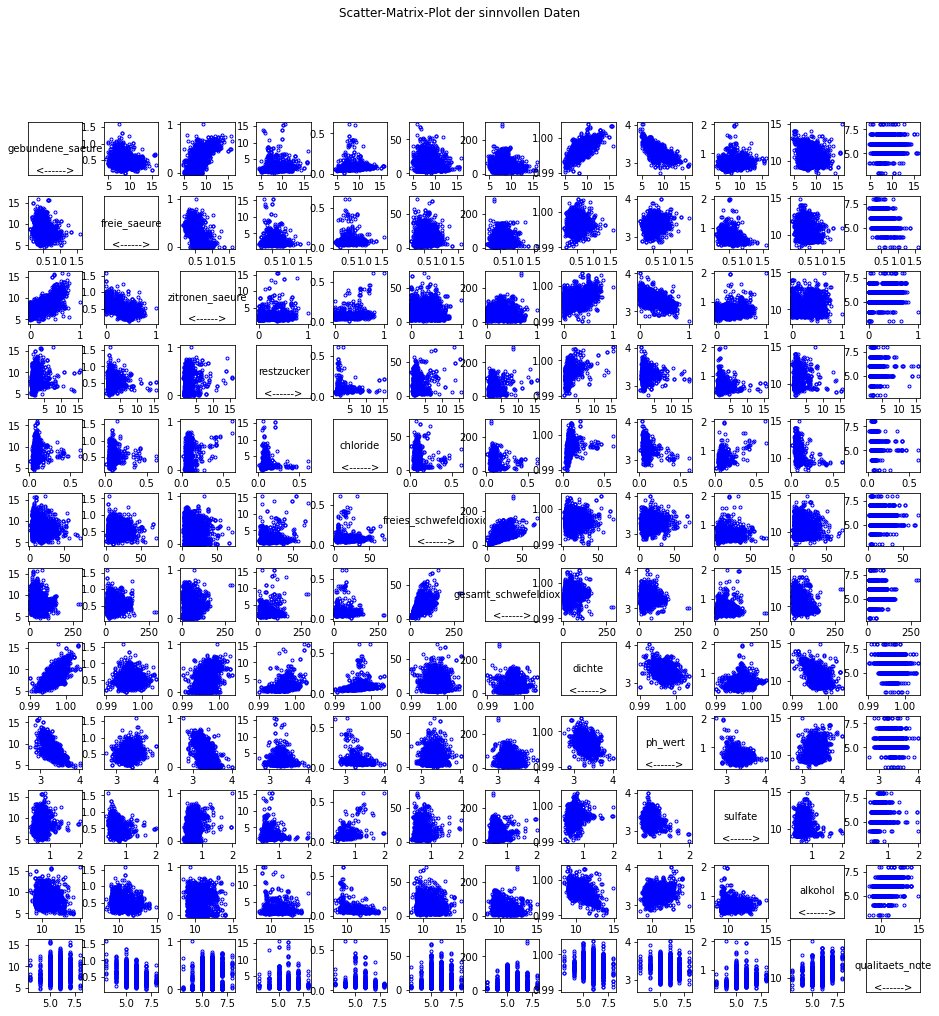

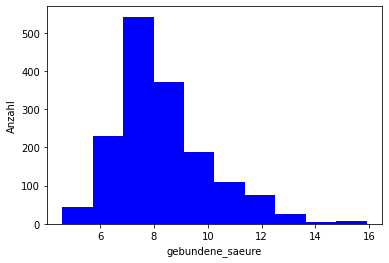

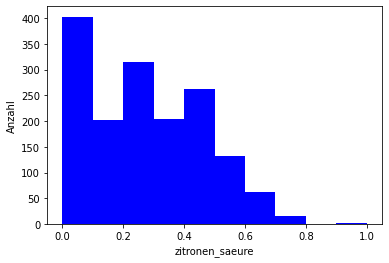

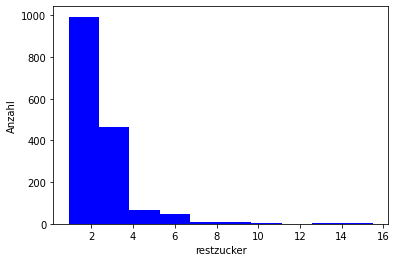

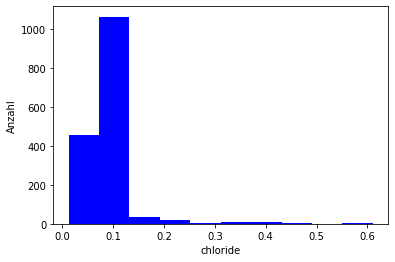

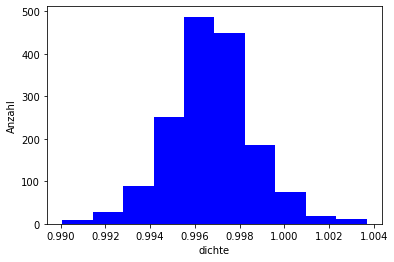

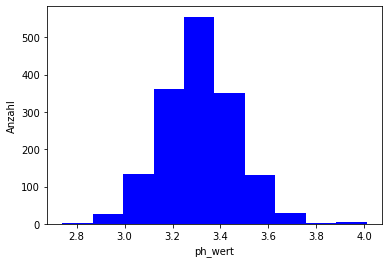

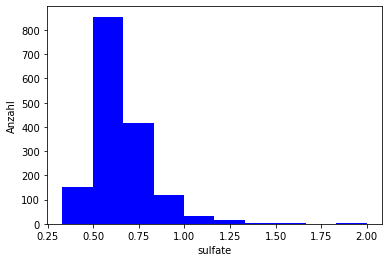

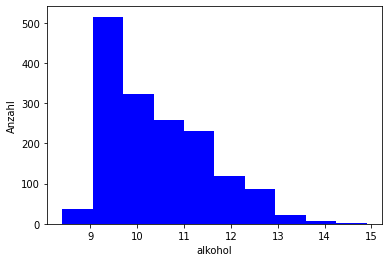

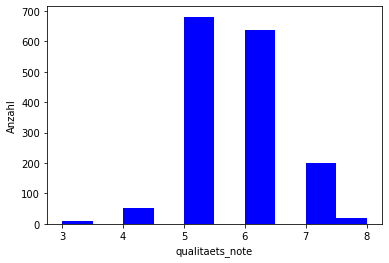

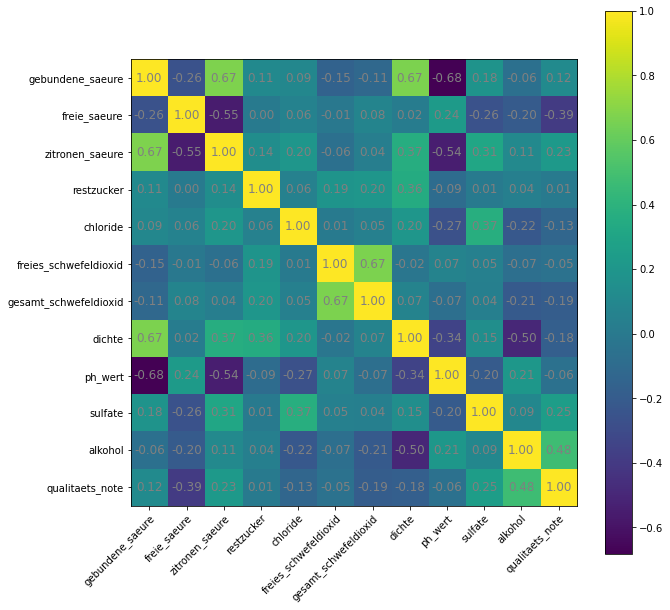

(959, 12) (639, 12) (959, 1) (639, 1) ['gebundene_saeure', 'freie_saeure', 'zitronen_saeure', 'restzucker', 'chloride', 'freies_schwefeldioxid', 'gesamt_schwefeldioxid', 'dichte', 'ph_wert', 'sulfate', 'alkohol', 'qualitaets_note']

[ 1.0010 -0.2842  0.6916  0.1580  0.0250 -0.1375 -0.1806  0.6906 -0.6956
  0.1713  0.0745  0.1812  0.1812] 	 gebundene_saeure
[-0.2842  1.0010 -0.5418 -0.0185  0.0051  0.0270  0.1199 -0.0285  0.2450
 -0.2562 -0.1639 -0.3544 -0.3544] 	 freie_saeure
[ 0.6916 -0.5418  1.0010  0.1249  0.1934 -0.0623 -0.0220  0.3887 -0.5651
  0.2889  0.1776  0.2250  0.2250] 	 zitronen_saeure
[ 0.1580 -0.0185  0.1249  1.0010 -0.0146  0.1298  0.1276  0.3719 -0.0826
  0.0104  0.1423  0.0665  0.0665] 	 restzucker
[ 0.0250  0.0051  0.1934 -0.0146  1.0010 -0.0079  0.0288  0.1245 -0.2470
  0.3999 -0.1718 -0.1018 -0.1018] 	 chloride
[-0.1375  0.0270 -0.0623  0.1298 -0.0079  1.0010  0.6942 -0.0461  0.1055
  0.0643 -0.0209 -0.0810 -0.0810] 	 freies_schwefeldioxid
[-0.1806  0.1199 -0.0220 

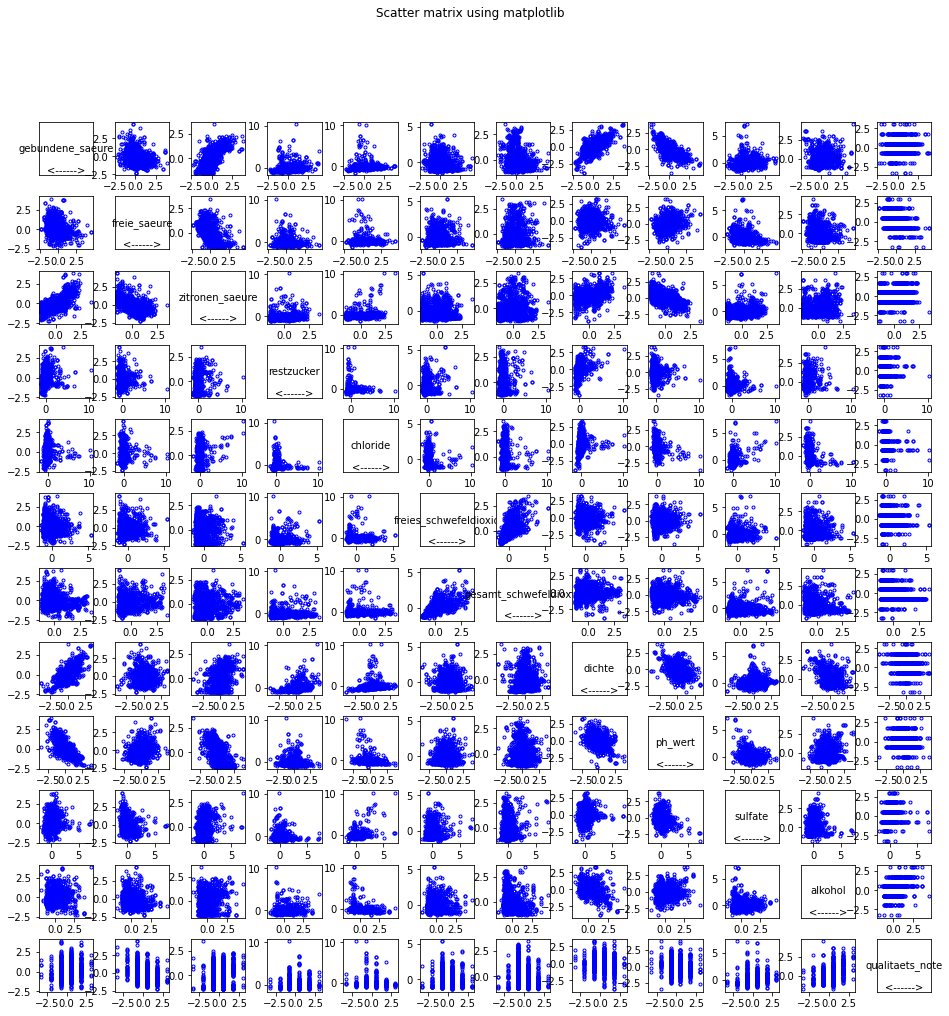

In [ ]:
if AUFGABE_3 :
    df = 0  
    # Einlesen der Daten
    df=pd.read_csv(BASEDIR + '/Data_Input/' + 'rotweinqualitaet.csv')

    # Die Daten einlesen 
    cols = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker','chloride','freies_schwefeldioxid','gesamt_schwefeldioxid','dichte','ph_wert','sulfate','alkohol','qualitaets_note']
    data = ml.pandas_to_numpy_matrix(df, cols)

    # Zu den eingelesenen Daten den Scatter-Matrix-Plot ausgeben
    fig = ml.scatterplot_matrix( data, 
                              cols,
                              linestyle='none', marker='.', color='blue', mfc='none')
    fig.suptitle('Scatter-Matrix-Plot der sinnvollen Daten')
    plt.show()

    #################################################################################


    anzahl_balken_im_histogramm = 10

    for i in range(data.shape[1]):
      plt.hist(data[:,i], bins = anzahl_balken_im_histogramm,color='blue',) 
      plt.xlabel(cols[i])
      plt.ylabel("Anzahl")
      plt.show()

    #################################################################################

    # Definition des Daten-Sub-Sets, also der Daten zu der die Kovarianzmatrix bestimmt werden soll 
    cols = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker','chloride','freies_schwefeldioxid','gesamt_schwefeldioxid','dichte','ph_wert','sulfate','alkohol','qualitaets_note']
    
    # Konvertierung der Daten vom Pandas-DF-Format in das Numpy-Format
    X = ml.pandas_to_numpy_matrix(df, cols)

    # Normieren so dass je Spalte
    #   1.) Der Mittewert und die Standardabweichung (Wurzel aus Varianz) berechnet werden
    #   2.) Die Werte der Spalten mit deren Mittelwert (M) und Standardabweichung (S) wie folgt normiert werden Out = (In - M)/S
    mean_X_std_col = ml.get_functionvalue_of_matrix_columns(X,np.mean)
    standard_abweichung_col = ml.get_functionvalue_of_matrix_columns(X,np.std)

    X_std = ml.scale_of_matrix_columns(X, mean_X_std_col, standard_abweichung_col)


    # Die Kovarianzmatrix der standardisierten Merkmale berechnen und als Heatmap ausgeben
    cov_mat = ml.covariance_matrix(X_std) # Kovarianzmatrix berechnen

    cols = cols      # Beschriftung der Heatmap bestimmen
    rows = cols
    schriftgroesse = 12 # Schriftgroesse fuer die Kaestchen bestimmen

    ml.show_matrix_as_heatplot(cov_mat, rows, cols, schriftgroesse) # Heatmap erzeugen und ausgeben


     # Hier die Paramater gemaess den vorangestellten Erlaueterungen einstellen

    # Angeordnet nach Betrag der Korrelation mit "Anzahl_Crew_Mitglieder"
    # bezogen auf den GESAMTDATENSATZ. Die Reihenfolge aendert sich (zum Glueck) bei Trainingsdatensatz nicht.
    SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker','chloride','freies_schwefeldioxid','gesamt_schwefeldioxid','dichte','ph_wert','sulfate','alkohol','qualitaets_note']
    #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker','chloride','freies_schwefeldioxid','dichte','ph_wert','alkohol']
    #SELEKTIERTE_MERKMALE = [ 'restzucker','chloride','freies_schwefeldioxid','gesamt_schwefeldioxid','dichte','ph_wert','sulfate','alkohol','qualitaets_note']
    #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker','chloride','freies_schwefeldioxid','gesamt_schwefeldioxid','dichte','ph_wert','sulfate','alkohol']
    #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker','chloride','freies_schwefeldioxid','gesamt_schwefeldioxid','dichte','ph_wert','sulfate']
    #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker','chloride','freies_schwefeldioxid','gesamt_schwefeldioxid','dichte','ph_wert']
    #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker','chloride','freies_schwefeldioxid','gesamt_schwefeldioxid','dichte']
    #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker','chloride','freies_schwefeldioxid','gesamt_schwefeldioxid']
    #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker','chloride','freies_schwefeldioxid'
    #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker','chloride']
    #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker']
    #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure','zitronen_saeure']
    #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure']
    #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure']
    #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','gesamt_schwefeldioxid','zitronen_saeure','dichte','sulfate','alkohol']
    #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','gesamt_schwefeldioxid','sulfate','alkohol']

    BIAS_BERUECKSICHTIGEN =  1          # 1 =>  Die Eingabematrix X fuer das Inverse-Matrix-Verfahren
                                        #       wird um eine ganz rechte Spalte mit lauter EINSEN ergaenzt.
                                        #       Dadurch wird (ueber die Daten) ein Bias implementiert, der 
                                        #       zunaechst nicht beruecktsichtugt wurde. 
                      

    STANDADISIERUNG = 1                 # Spaltenweise (also je Merkmal) eine Standardisierung durchfuehren
                                        # ACHTUNG:  Wenn eine Standardisierung durchgefuehrt wird, dann muss der Bias nicht 
                                        #           explizit beruecksichtigt werden, da dies dann schon implizit mit der Standardisierung
                                        #           beruecksichtigt wird. Es schadet aber auch nicht wenn man den Bias trotzdem noch explizit
                                        #           beruecksichtigt.

    STANDADISIERUNG_AUCH_DER_AUSGABEDATEN = 1 # Optional kann man auch die Ausgabedaen noch standardisieren
                                              # um alle Daten dann numerisch guenstiger zu gestalten.

    HAUPTKOMPONENTENTRANSFORMATION = 1  # ACHTUNG: Wenn die Hauptkomponententransformation aktiviert wird, 
                                        # dann MUSS auch die Standardisierung aktiviert werden.

    HAUPTKOMPONENTEN_DIMENSIONEN = 4    # ACHTUNG:  Dieser Wert muss in folgendem Wertebereich liegen 
                                        #           1 < HAUPTKOMPONENTEN_DIMENSIONEN <= Anzahl Einträge in SELEKTIERTE_MERKMALE
                                        #           Grund: Man kann die Anzahl der aus der Hauptkoponententransformation
                                        #           zu verwendenten Merkmale nicht mit 5 definieren wenn in die Transformation nur 3
                                        #           originale Merkmale "hinein gegangen sind", denn es gehen dann auch maximal nur 3 heraus.

    # Selektion der Merkmale die verwendet werden sollen
    # Die eigentliche Definition erfolge ueber SELEKTIERTE_MERKMALE
    # bereits weiter oben.
    cols_selected_X = SELEKTIERTE_MERKMALE

    # Formale Selektion der Zielwerte. Dies ist immer "qualitaets_note" bei dieser Aufgabenstellung
    cols_selected_y = ['qualitaets_note']


    # Erzeugung der entsprechende NumPy-Matrizen
    X = ml.pandas_to_numpy_matrix(df, cols_selected_X) # Merkmal-Matrix
    y = ml.pandas_to_numpy_matrix(df, cols_selected_y) # Zielwert-Matrix

    # Aufteilung der selektierten Daten in Trainings- und Test-Datensätze
    # 60% gehen in den Trainingsdatensatz, 40% in den Testdatensatz und der Rest (in diesem Fall 0%) in den Validierungsdatensatz
    # Damit die Signatur der Funktion erfuellt wird muessen fuer den Validierungsdatensatz dummy_1 und dummy_2 angegeben werden.
    X_train, X_test, dummy_1, y_train, y_test, dummy_2  = ml.split_matrix_horizontal(X, y , percent_train=60, percent_test=40)

    print(X_train.shape,X_test.shape, y_train.shape,y_test.shape, cols_selected_X)
    print("")

    # Definition des Daten-Sub-Sets, also der Daten zu der die Kovarianzmatrix bestimmt werden soll 
    #cols_Xy = [ 'BRT','Max_Passagiere', 'Alter','Laenge', 'Anzahl_Kabinen','Dichte_Passagiere','Anzahl_Crew_Mitglieder']
    cols_Xy = np.hstack ((cols_selected_X,cols_selected_y))

    # Zusammenfuehren von X_train und y_train in eine Matrix Xy und fuer diese Matrix die Korrelationen bestimmen
    Xy_train = np.hstack((X_train, y_train))

    
    #mean_Xy_std_col = np.mean(Xy_train,axis=0)  # ml.get_functionvalue_of_matrix_columns(Xy_train,ml.mean_of_matrix)
    #standard_abweichung_Xy_col = np.std(Xy_train,axis=0)              # ml.get_functionvalue_of_matrix_columns(Xy_train,ml.standard_deviation_of_matrix)

    #mean_Xy_std_col = np.reshape(mean_Xy_std_col,[mean_Xy_std_col.size,1])

    mean_Xy_std_col =  ml.get_functionvalue_of_matrix_columns(Xy_train,np.mean)
    standard_abweichung_Xy_col =  ml.get_functionvalue_of_matrix_columns(Xy_train,np.std)


    Xy_std = ml.scale_of_matrix_columns(Xy_train, mean_Xy_std_col, standard_abweichung_Xy_col)


    # Die Kovarianzmatrix der standardisierten Merkmale berechnen und als Heatmap ausgeben
    cov_mat_Xy = ml.covariance_matrix(Xy_std) # Kovarianzmatrix berechnen

    # Die Kovarianzmatrix kann auch sehr rudimentaer ausgegeben werden
    np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
    for i in range(len(cols_Xy)):
      print(cov_mat_Xy[i],'\t',cols_Xy[i])

    if STANDADISIERUNG == 1:
      X_train_std, mean_X_train_col, standard_deviation_X_train_col = ml.standardisation_of_matrix_columns(X_train)
      X_test_std = ml.scale_of_matrix_columns(X_test, mean_X_train_col, standard_deviation_X_train_col)

    else:
      X_train_std = X_train
      X_test_std = X_test

    # Zu dem Subset der Trainings-Eingabe-Daten den Scatter-Matrix-Plot ausgeben
    r,c = X_train_std.shape
    if c > 1 :   # Es werden wenigsten 2 Spalten verlangt ansonsten kann nicht geplottet werden
      fig = ml.scatterplot_matrix( X_train_std, 
                                cols_selected_X,
                                linestyle='none', marker='.', color='blue', mfc='none')
      fig.suptitle('Scatter matrix using matplotlib')
      plt.show()

## Ab hier Ihre für die Analyse vewendeten Berechnungen und Darstellung einfügen


# **Aufgabe 4: Problemlösung zur Weinqualittätsbestimmung unter Verwendung der PCA**
In dieser Aufgabe sollen Sie die in Aufgabe 1 erstellte Code-Zelle KOPIEREN und so anpassen, dass damit die Problemstellung "Weinqualitätsbestimmung" gelöst wird.

Dies erfolgt hier also unter Verwendung der Hauptkomponentenanalyse und mit der Standardisierung der originalen Merkmale. Lösen Sie das Problem und evaluieren Sie in wieweit die Anzahl der nach der Hauptkomponententransformation verwendeten transformierten Merkmale einen Einfluss auf die Qualität der Prolemlösung hat.

Beschreiben Sie in der Text-Zelle "Ergebnisse zu Aufgabe 4" die Ergebnisse Ihrer Evaluation.

## Ergebnisse zu Aufgabe 4
Aus dem Skript erfahren wir bereits einen wichtigen Hinweis (Kapitel C Seite 26)[...]
Oftmals muss man dazu deutlich weniger als ein Drittel der Merkmale nehmen und hat somit eine deutliche [...] Rechenleistungsbedarfsreduzierung erreicht. Auch ist es so, dass Probleme mit weniger Dimensionen numerisch günstiger konditioniert sind und zusätzlich auch noch leichter zu trainieren sind. Auch hat sich gezeigt, dass eine Dimensionsreduzierung oftmals einem Übertrainieren entgegen wirkt.

Dies wird hier deutlich, das vorherige Beispiel der Kreuzfahrtschiffe hatte wesentlich weniger Merkmale die zudem stärker voneinander Abhängig waren, hier jedoch gibt es eine Vielzahl an Merkmalen die teils schwach oder garnicht korrelieren. Dies spiegelt sich auch in den MSE Werten wieder.    

In [ ]:
if AUFGABE_4 :
  df = 0  
  #1 Daten einlesen, grob sichten und erste Korrelationsanalye
  # Einlesen der Daten
  df=pd.read_csv(BASEDIR + '/Data_Input/' + 'rotweinqualitaet.csv')

  #==========================================================================================================================

  #1a Grobe Sichtung
  #entfällt da grafische Ausgaben entfallen

  #==========================================================================================================================

  #1b Korrelationsanalyse
  # Definition des Daten-Sub-Sets
  cols = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker','chloride','freies_schwefeldioxid','gesamt_schwefeldioxid','dichte','ph_wert','sulfate','alkohol','qualitaets_note']
    
  # Konvertierung der Daten vom Pandas-DF-Format in das Numpy-Format
  X = ml.pandas_to_numpy_matrix(df, cols)

  # Normieren so dass je Spalte
  #   1.) Der Mittewert und die Standardabweichung (Wurzel aus Varianz) berechnet werden
  #   2.) Die Werte der Spalten mit deren Mittelwert (M) und Standardabweichung (S) wie folgt normiert werden Out = (In - M)/S
  mean_X_std_col = ml.get_functionvalue_of_matrix_columns(X,np.mean)
  standard_abweichung_col = ml.get_functionvalue_of_matrix_columns(X,np.std)

  X_std = ml.scale_of_matrix_columns(X, mean_X_std_col, standard_abweichung_col)

  #==========================================================================================================================
  

  #2PARAMETRIERUNG und Datenfluss der Berechnungen

  # Hier die Paramater gemaess den vorangestellten Erlaueterungen einstellen

  # Angeordnet nach Betrag der Korrelation mit "Anzahl_Crew_Mitglieder"
  # bezogen auf den GESAMTDATENSATZ. Die Reihenfolge aendert sich (zum Glueck) bei Trainingsdatensatz nicht.
  SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker','chloride','freies_schwefeldioxid','gesamt_schwefeldioxid','dichte','ph_wert','sulfate','alkohol']
  #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker','chloride','freies_schwefeldioxid','gesamt_schwefeldioxid','dichte','ph_wert','sulfate','alkohol']
  #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker','chloride','freies_schwefeldioxid','gesamt_schwefeldioxid','dichte','ph_wert','sulfate']
  #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker','chloride','freies_schwefeldioxid','gesamt_schwefeldioxid','dichte','ph_wert']
  #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker','chloride','freies_schwefeldioxid','gesamt_schwefeldioxid','dichte']
  #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker','chloride','freies_schwefeldioxid','gesamt_schwefeldioxid']
  #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker','chloride','freies_schwefeldioxid'
  #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker','chloride']
  #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker']
  #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure','zitronen_saeure']
  #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure']
  #SELEKTIERTE_MERKMALE = [ 'alkohol','zitronen_saeure']
  #SELEKTIERTE_MERKMALE = [ 'alkohol','zitronen_saeure','dichte']
  #SELEKTIERTE_MERKMALE = [ 'alkohol','gesamt_schwefeldioxid']
  #SELEKTIERTE_MERKMALE = [ 'alkohol','freies_schwefeldioxid']
  #SELEKTIERTE_MERKMALE = [ 'alkohol','zitronen_saeure','gesamt_schwefeldioxid']
  #SELEKTIERTE_MERKMALE = [ 'alkohol','zitronen_saeure','freies_schwefeldioxid']
  #SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker','chloride','freies_schwefeldioxid','dichte','ph_wert','alkohol']
  #SELEKTIERTE_MERKMALE = [ 'restzucker','chloride','freies_schwefeldioxid','gesamt_schwefeldioxid','dichte','ph_wert','sulfate','alkohol']
  #SELEKTIERTE_MERKMALE = [ 'alkohol','gebundene_saeure']
  #SELEKTIERTE_MERKMALE = ['zitronen_saeure' ,'alkohol', 'sulfate']
  

  #==========================================================================================================================

  BIAS_BERUECKSICHTIGEN = 1             # 1 =>  Die Eingabematrix X fuer das Inverse-Matrix-Verfahren
                                        #       wird um eine ganz rechte Spalte mit lauter EINSEN ergaenzt.
                                        #       Dadurch wird (ueber die Daten) ein Bias implementiert, der 
                                        #       zunaechst nicht beruecktsichtugt wurde. 
                      

  STANDADISIERUNG = 1                 # Spaltenweise (also je Merkmal) eine Standardisierung durchfuehren
                                        # ACHTUNG:  Wenn eine Standardisierung durchgefuehrt wird, dann muss der Bias nicht 
                                        #           explizit beruecksichtigt werden, da dies dann schon implizit mit der Standardisierung
                                        #           beruecksichtigt wird. Es schadet aber auch nicht wenn man den Bias trotzdem noch explizit
                                        #           beruecksichtigt.

  STANDADISIERUNG_AUCH_DER_AUSGABEDATEN = 1 # Optional kann man auch die Ausgabedaen noch standardisieren
                                              # um alle Daten dann numerisch guenstiger zu gestalten.

  HAUPTKOMPONENTENTRANSFORMATION = 1  # ACHTUNG: Wenn die Hauptkomponententransformation aktiviert wird, 
                                        # dann MUSS auch die Standardisierung aktiviert werden.

  HAUPTKOMPONENTEN_DIMENSIONEN = 4     # ACHTUNG:  Dieser Wert muss in folgendem Wertebereich liegen 
                                        #           1 < HAUPTKOMPONENTEN_DIMENSIONEN <= Anzahl Einträge in SELEKTIERTE_MERKMALE
                                        #           Grund: Man kann die Anzahl der aus der Hauptkoponententransformation
                                        #           zu verwendenten Merkmale nicht mit 5 definieren wenn in die Transformation nur 3
                                        #           originale Merkmale "hinein gegangen sind", denn es gehen dann auch maximal nur 3 heraus.

  #==========================================================================================================================
  
  #3 Aufteilung der Daten in einen Trainings- und Testdatensatz

  # Selektion der Merkmale die verwendet werden sollen
  cols_selected_X = SELEKTIERTE_MERKMALE

  # Formale Selektion der Zielwerte. Dies ist immer "Anzahl_Crew_Mitglieder" bei unserer Aufgabenstellung
  cols_selected_y = ['qualitaets_note']

  # Erzeugung der entsprechende NumPy-Matrizen
  X = ml.pandas_to_numpy_matrix(df, cols_selected_X) # Merkmal-Matrix
  y = ml.pandas_to_numpy_matrix(df, cols_selected_y) # Zielwert-Matrix


  # Aufteilung der selektierten Daten in Trainings- und Test-Datensätze
  # 60% gehen in den Trainingsdatensatz, 40% in den Testdatensatz und der Rest (in diesem Fall 0%) in den Validierungsdatensatz
  # Damit die Signatur der Funktion erfuellt wird muessen fuer den Validierungsdatensatz dummy_1 und dummy_2 angegeben werden.
  X_train, X_test, dummy_1, y_train, y_test, dummy_2  = ml.split_matrix_horizontal(X, y , percent_train=60, percent_test=40)

  
  #print(X_train.shape,X_test.shape, y_train.shape,y_test.shape, cols_selected_X)
  #Ausgabe hier entfällt nach Aufgabenstellung
  

  # Definition des Daten-Sub-Sets, also der Daten zu der die Kovarianzmatrix bestimmt werden soll 
  #cols_Xy = [ 'BRT','Max_Passagiere', 'Alter','Laenge', 'Anzahl_Kabinen','Dichte_Passagiere','Anzahl_Crew_Mitglieder']
  cols_Xy = np.hstack ((cols_selected_X,cols_selected_y))

  # Zusammenfuehren von X_train und y_train in eine Matrix Xy und fuer diese Matrix die Korrelationen bestimmen
  Xy_train = np.hstack((X_train, y_train))


  mean_Xy_std_col =  ml.get_functionvalue_of_matrix_columns(Xy_train,np.mean)
  standard_abweichung_Xy_col =  ml.get_functionvalue_of_matrix_columns(Xy_train,np.std)

  Xy_std = ml.scale_of_matrix_columns(Xy_train, mean_Xy_std_col, standard_abweichung_Xy_col)

  # Die Kovarianzmatrix der standardisierten Merkmale berechnen und als Heatmap ausgeben
  cov_mat_Xy = ml.covariance_matrix(Xy_std) # Kovarianzmatrix berechnen

  #Die rudimentaere Ausgabe der Kovarianz entfaellt gemaeß der Aufgabenstellung

#==========================================================================================================================

  #4a Standardisieren der Trainingseingabedaten (Merkmalsvektoren)
  
  if STANDADISIERUNG == 1:
    X_train_std, mean_X_train_col, standard_deviation_X_train_col = ml.standardisation_of_matrix_columns(X_train)
    X_test_std = ml.scale_of_matrix_columns(X_test, mean_X_train_col, standard_deviation_X_train_col)

  else:
    X_train_std = X_train
    X_test_std = X_test

  #Scatter-Matrix-Plot aus 4a entfällt gemaeß der Aufgabenstellung

  #==========================================================================================================================

  #4b Standardisieren der Ausgabedaten (Zielwerte)

  if STANDADISIERUNG_AUCH_DER_AUSGABEDATEN == 1:
    y_train_std, mean_y_train_col, standard_deviation_y_train_col = ml.standardisation_of_matrix_columns(y_train)
    y_test_std = ml.scale_of_matrix_columns(y_test, mean_y_train_col, standard_deviation_y_train_col)

    #print(y_train_std.shape,y_test_std.shape, mean_y_train_col, standard_deviation_y_train_col)
    #Ausgabe der Kovarianz entfaellt gemaeß der Aufgabenstellung

  else:
    y_train_std = y_train
    y_test_std = y_test  
  
  #==========================================================================================================================
  #5 Hauptkomponentenanalyse, Selektion der zu berücksichtigenden Hauptkomponenten und Transformation der standardisierten Eingabedaten

  #5a Hauptkomponentenanalyse auf Basis der Singuläre Werte Zerlegung (SVT)

  # Sichtung ob Spalte n eine Gleichanteil von 0 (bzw. wegen Rechenungenauigkeit einen sehr sehr kleinen Wert) und eine Varianz von 1 hat. 
  # Also auf den Exponenten achten.
  #n = 0
  #temp_mean_X = np.mean(X_train_std[:, n]) 
  #temp_var_X = np.var(X_train_std[:, n])    
  #temp_mean_y = np.mean(y_train_std[:, 0]) 
  #temp_var_y = np.var(y_train_std[:, 0]) 

  #print(temp_mean_X, temp_var_X, temp_mean_y, temp_var_y)
  #Ausgabe der Sichtung des Gleichanteils entfaellt gemaeß der Aufgabenstellung


  # Hauptkomponentenanalyse
  # Hierzu wird eine Singulare-Werte-Zerlegung (Singular Value Decomposing, SVD) durchgefuehrt.
  # Die Transformationsmatrix der SVD ist dabei die Transformationsmatrix der Hauptkomponetnentransformation
  # Die Rotationsmatrix ergibt sich als Vt.T also als Transponierte von Vt.
  U, s, Vt = np.linalg.svd(X_train_std) 
  #print(Vt.T)
  #Ausgabe einfaellt 

  #==========================================================================================================================
  #5b Selektion der zu berücksichtigenden Hauptkomponenten und Erzeugung der entsprechenden Matrix für die Rotation.

  anzahl_dimensionen = HAUPTKOMPONENTEN_DIMENSIONEN         # Bestimmung welche n ersten Dimensionen fuer die Dimensionsreduktion genommen werden sollen

  Wpca = Vt.T[ : , : anzahl_dimensionen]   # Die reduzierte Rotationsmatrix bestimmen, transponieren und in die Matrix W kopieren

  #==========================================================================================================================
  #6 Hauptkomponententransformation

  #6a Transformation der Eingabedaten
  if HAUPTKOMPONENTENTRANSFORMATION == 1:
    X_train_reg = X_train_std.dot(Wpca)     # Die Trainigseingabedaten MUESSEN hier (also vor der Regression) schon transformiert werden
    X_test_reg  = X_test_std.dot(Wpca)      # Die Testeingabedaten werden sicherheitshalber (damit man es nicht vergisst) auch
                                            # hier schon transformiert.
  else:
    X_train_reg = X_train_std    
    X_test_reg  = X_test_std 


  #print("Merkmalsvektor OUT:",X_train_reg[0],"\n")
  #print("Merkmalsvektor IN:",X_train_std[0],"\n")
  #print("Wpca:\n", Wpca)
  #Ausgabe entfaellt 

  #==========================================================================================================================
  #6b Sichtung der weiter verwendeten (ggf. transformierten) Eingabedaten
  #Ausgabe entfaellt


  #==========================================================================================================================
  #7 Training (Regression)

  if BIAS_BERUECKSICHTIGEN == 1: 
    # Die Einsspalte fuer den Bias  hinzufuegen
    X_train_reg = ml.append_bias_column(X_train_reg)  
    X_test_reg = ml.append_bias_column(X_test_reg) 

  #==========================================================================================================================
  #7a Inverse-Matrix-Verfahren
    W_IM = ml.linear_regression (X_train_reg,y_train_std)

    #print("X_train_reg.shape:", X_train_reg.shape)
    #print ("Gewichte fuer absolutes Minimum gemaess Inverse-Matrix-Verfahren: \n", W_IM)
    #print(W_IM.shape)
    #Ausgaben entfallen


  #==========================================================================================================================
  #8 Überprüfung der Lösungen anhand der Trainings- und Test-Daten
  
  #8a Berechnung der Vorhersagen (Ist-Ausgabedaten)
  # Ueberpruefung der Loesung aus dem Inverse-Matrix-Verfahren
  y_train_pred_IM = np.dot(X_train_reg, W_IM)
  y_test_pred_IM = np.dot(X_test_reg, W_IM)

  #==========================================================================================================================
  #8b Rück-Standardisieren der Ist-Ausgabedaten
  if STANDADISIERUNG_AUCH_DER_AUSGABEDATEN == 1:
    #Inverse-Matrix-Verfahren
    y_train_pred_stdback_IM = ml.restandardisation_of_matrix_columns(y_train_pred_IM, mean_y_train_col, standard_deviation_y_train_col )
    y_test_pred_stdback_IM  = ml.restandardisation_of_matrix_columns(y_test_pred_IM,  mean_y_train_col, standard_deviation_y_train_col )
    
  else:
    #Inverse-Matrix-Verfahren
    y_train_pred_stdback_IM = y_train_pred_IM
    y_test_pred_stdback_IM  = y_test_pred_IM

  #==========================================================================================================================
  #8c
  # Inverse-Matrix-Verfahren
  mse_test_IM = ml.mean_square_error_of_two_matrixes(y_test, y_test_pred_stdback_IM)   
  mse_train_IM = ml.mean_square_error_of_two_matrixes(y_train, y_train_pred_stdback_IM)

  print ("\n--------------------------------------------------------------------------")
  print ("Eingestellte Parameter der Datenvorverarbeitung ")
  print ("   SELEKTIERTE_MERKMALE:           ", SELEKTIERTE_MERKMALE)
  print ("   BIAS_BERUECKSICHTIGEN:          ", BIAS_BERUECKSICHTIGEN)
  print ("   STANDADISIERUNG:                ", STANDADISIERUNG)
  print ("   HAUPTKOMPONENTENTRANSFORMATION: ", HAUPTKOMPONENTENTRANSFORMATION)
  print ("   HAUPTKOMPONENTEN_DIMENSIONEN:   ", HAUPTKOMPONENTEN_DIMENSIONEN)

  print ("\nMSE bezueglich Trainingsdaten ")
  print ("   Inverse-Matrix-Verfahren:       ", mse_train_IM)

  print ("\nMSE bezueglich Testdaten ")
  print ("   Inverse-Matrix-Verfahren:    "  , mse_test_IM)

  #Weitere Ausgaben aus
  #8d Darstellung der Differenzen (Soll-Ausgabewert - Ist-Ausgabewert)
  #8e Darstellung des Histrogramm zu den Fehlerbetraegen
  #8f Auflistung: Soll , Ist , Soll-Ist
  #enfallen gemaeß der Aufgabenstellung



--------------------------------------------------------------------------
Eingestellte Parameter der Datenvorverarbeitung 
   SELEKTIERTE_MERKMALE:            ['gebundene_saeure', 'freie_saeure', 'zitronen_saeure', 'restzucker', 'chloride', 'freies_schwefeldioxid', 'gesamt_schwefeldioxid', 'dichte', 'ph_wert', 'sulfate', 'alkohol']
   BIAS_BERUECKSICHTIGEN:           1
   STANDADISIERUNG:                 1
   HAUPTKOMPONENTENTRANSFORMATION:  1
   HAUPTKOMPONENTEN_DIMENSIONEN:    4

MSE bezueglich Trainingsdaten 
   Inverse-Matrix-Verfahren:        0.4392311798925598

MSE bezueglich Testdaten 
   Inverse-Matrix-Verfahren:     0.4402293130129353


# **Aufgabe 5: Problemlösung zur Weinqualittätsbestimmung OHNE Verwendung der PCA**
In dieser Aufgabe sollen Sie die in Aufgabe 2 erstellte Code-Zelle KOPIEREN und so anpassen, dass damit die Problemstellung "Weinqualitätsbestimmung" gelöst wird.

Dies erfolgt hier also OHNE Verwendung der Hauptkomponentenanalyse ABER MIT der Standardisierung der originalen Merkmale. Lösen Sie das Problem und eruieren Sie inwieweit die Anzahl und Art der verwendeten originalen Merkmale einen Einfluss auf die Qualität der Prolemlösung hat. 

Gehen Sie bei der Eruierung nicht wahrlos vor sondern orientieren Sie sich dabei an der in Aufgabe 3 festgestellten "Wichtigkeit" der Merkmale.

Beschreiben Sie in der Text-Zelle "Ergebnisse zu Aufgabe 5" die Ergebnisse Ihrer Evaluation.

## Ergebnisse zu Aufgabe 5
2 Selektierte Merkmale :
SELEKTIERTE_MERKMALE = [ 'alkohol','freie_saeure'] : 

MSE bezueglich Trainingsdaten : 0.4477841103997216

MSE bezueglich Testdaten : 0.44457028458029435

<br>
2 Selektierte Merkmale :
SELEKTIERTE_MERKMALE = [ 'alkohol','sulfate'] :

MSE bezueglich Trainingsdaten : 0.47939284153803385

MSE bezueglich Testdaten : 0.476095812852285

<br>
Da wie in 3) beschrieben der Einfluss des 'alkohol' sowie der 'freien_saeure' und 'sulfate' am größten sind, ergeben sich bereits bei nur 2 Selektierten Merkmalen sehr gute Werte. 

============================================================================

2 Selektierte Merkmale :
SELEKTIERTE_MERKMALE = [ 'alkohol','restzucker']

MSE bezueglich Trainingsdaten : 0.4982136609517122

MSE bezueglich Testdaten : 0.5150671045069074

<br>
Da wie in 3) beschrieben, der Einfluss des 'restzucker' keine große Aussagekraft ueber die 'qualitaets_note' beinhaltet sind hier die Fehler zwischen Test und Trainingsdaten größer, als bei den ersten beiden Selektionen.


============================================================================

3 Selektierte Merkmale :
SELEKTIERTE_MERKMALE = [ 'alkohol','freie_saeure','sulfate'] :

MSE bezueglich Trainingsdaten : 0.44056087053927506

MSE bezueglich Testdaten : 0.42664830779128315

<br>

Bereits mit weniger Selektierten Merkmalen wurde oben ein besserer Wert erreicht.

============================================================================

5 Selektierte Merkmale :
SELEKTIERTE_MERKMALE = [ 'alkohol','freie_saeure','sulfate','dichte','gesamt_schwefeldioxid']

MSE bezueglich Trainingsdaten : 0.4271410397762404

MSE bezueglich Testdaten : 0.43881703890580565

Die Zunahme weiterer Merkmale bringt auch hier keine Verbesserung der Ergebnisse.


============================================================================


Auch hier wird ersichtlich, dass es vollkommen ausreicht, dass je stärkere Merkmal, linear abhängiger Größen zu nehmen, auch wie in 4 schon beschrieben  (Kapitel C Seite 26)[...]
Oftmals muss man dazu deutlich weniger als ein Drittel der Merkmale nehmen  
[...] Auch ist es so, dass Probleme mit weniger Dimensionen numerisch günstiger konditioniert sind und zusätzlich auch noch leichter zu trainieren sind. Auch hat sich gezeigt, dass eine Dimensionsreduzierung oftmals einem Übertrainieren entgegen wirkt.

Wie im folgenden Beispiel mit allen Selektierten Merkmalen deutlich wird.

9 Selektierte Merkmale :
SELEKTIERTE_MERKMALE = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker','chloride','freies_schwefeldioxid','dichte','ph_wert','alkohol']

MSE bezueglich Trainingsdaten 0.4387908314286417

MSE bezueglich Testdaten      0.4465857485536904

<br>



In [ ]:
if AUFGABE_5 :
  df = 0  
  #1
  # Einlesen der Daten
  df=pd.read_csv(BASEDIR + '/Data_Input/' + 'rotweinqualitaet.csv')

  #==========================================================================================================================

  #1a einfällt da grafische Ausgaben entfallen

  #==========================================================================================================================

  #1b Korrelationsanalyse
  # Definition des Daten-Sub-Sets
  cols = [ 'gebundene_saeure','freie_saeure','zitronen_saeure','restzucker','chloride','freies_schwefeldioxid','gesamt_schwefeldioxid','dichte','ph_wert','sulfate','alkohol','qualitaets_note']
    
  # Konvertierung der Daten vom Pandas-DF-Format in das Numpy-Format
  X = ml.pandas_to_numpy_matrix(df, cols)

  # Normieren so dass je Spalte
  #   1.) Der Mittewert und die Standardabweichung (Wurzel aus Varianz) berechnet werden
  #   2.) Die Werte der Spalten mit deren Mittelwert (M) und Standardabweichung (S) wie folgt normiert werden Out = (In - M)/S
  mean_X_std_col = ml.get_functionvalue_of_matrix_columns(X,np.mean)
  standard_abweichung_col = ml.get_functionvalue_of_matrix_columns(X,np.std)

  X_std = ml.scale_of_matrix_columns(X, mean_X_std_col, standard_abweichung_col)

  #==========================================================================================================================
  

  #2 PARAMETRIERUNG und Datenfluss der Berechnungen
  
  # Hier die Paramater gemaess den vorangestellten Erlaueterungen einstellen
  # bezogen auf den GESAMTDATENSATZ. Die Reihenfolge aendert sich (zum Glueck) bei Trainingsdatensatz nicht.
  
  SELEKTIERTE_MERKMALE = [ 'alkohol','freie_saeure']
  #SELEKTIERTE_MERKMALE = [ 'alkohol','sulfate']
  #SELEKTIERTE_MERKMALE = [ 'alkohol','restzucker']
  #SELEKTIERTE_MERKMALE = [ 'freie_saeure','sulfate','alkohol']
  #SELEKTIERTE_MERKMALE = [ 'alkohol','freie_saeure','sulfate','dichte','gesamt_schwefeldioxid']
 
 

  BIAS_BERUECKSICHTIGEN =  1          # 1 =>  Die Eingabematrix X fuer das Inverse-Matrix-Verfahren
                                        #       wird um eine ganz rechte Spalte mit lauter EINSEN ergaenzt.
                                        #       Dadurch wird (ueber die Daten) ein Bias implementiert, der 
                                        #       zunaechst nicht beruecktsichtugt wurde. 
                      

  STANDADISIERUNG = 1                 # Spaltenweise (also je Merkmal) eine Standardisierung durchfuehren
                                        # ACHTUNG:  Wenn eine Standardisierung durchgefuehrt wird, dann muss der Bias nicht 
                                        #           explizit beruecksichtigt werden, da dies dann schon implizit mit der Standardisierung
                                        #           beruecksichtigt wird. Es schadet aber auch nicht wenn man den Bias trotzdem noch explizit
                                        #           beruecksichtigt.

  STANDADISIERUNG_AUCH_DER_AUSGABEDATEN = 0 # Optional kann man auch die Ausgabedaen noch standardisieren
                                              # um alle Daten dann numerisch guenstiger zu gestalten.

  HAUPTKOMPONENTENTRANSFORMATION = 0  # ACHTUNG: Wenn die Hauptkomponententransformation aktiviert wird, 
                                        # dann MUSS auch die Standardisierung aktiviert werden.

  HAUPTKOMPONENTEN_DIMENSIONEN = 3      # ACHTUNG:  Dieser Wert muss in folgendem Wertebereich liegen 
                                        #           1 < HAUPTKOMPONENTEN_DIMENSIONEN <= Anzahl Einträge in SELEKTIERTE_MERKMALE
                                        #           Grund: Man kann die Anzahl der aus der Hauptkoponententransformation
                                        #           zu verwendenten Merkmale nicht mit 5 definieren wenn in die Transformation nur 3
                                        #           originale Merkmale "hinein gegangen sind", denn es gehen dann auch maximal nur 3 heraus.

  #==========================================================================================================================
  
  #3 Aufteilung der Daten in einen Trainings- und Testdatensatz

  # Selektion der Merkmale die verwendet werden sollen
  cols_selected_X = SELEKTIERTE_MERKMALE

  # Formale Selektion der Zielwerte. Dies ist immer "Anzahl_Crew_Mitglieder" bei unserer Aufgabenstellung
  cols_selected_y = ['qualitaets_note']

  # Erzeugung der entsprechende NumPy-Matrizen
  X = ml.pandas_to_numpy_matrix(df, cols_selected_X) # Merkmal-Matrix
  y = ml.pandas_to_numpy_matrix(df, cols_selected_y) # Zielwert-Matrix


  # Aufteilung der selektierten Daten in Trainings- und Test-Datensätze
  # 60% gehen in den Trainingsdatensatz, 40% in den Testdatensatz und der Rest (in diesem Fall 0%) in den Validierungsdatensatz
  # Damit die Signatur der Funktion erfuellt wird muessen fuer den Validierungsdatensatz dummy_1 und dummy_2 angegeben werden.
  X_train, X_test, dummy_1, y_train, y_test, dummy_2  = ml.split_matrix_horizontal(X, y , percent_train=60, percent_test=40)

  
  #print(X_train.shape,X_test.shape, y_train.shape,y_test.shape, cols_selected_X)
  #Ausgabe hier entfällt nach Aufgabenstellung
  

  # Definition des Daten-Sub-Sets, also der Daten zu der die Kovarianzmatrix bestimmt werden soll 
  #cols_Xy = [ 'BRT','Max_Passagiere', 'Alter','Laenge', 'Anzahl_Kabinen','Dichte_Passagiere','Anzahl_Crew_Mitglieder']
  cols_Xy = np.hstack ((cols_selected_X,cols_selected_y))

  # Zusammenfuehren von X_train und y_train in eine Matrix Xy und fuer diese Matrix die Korrelationen bestimmen
  Xy_train = np.hstack((X_train, y_train))


  mean_Xy_std_col =  ml.get_functionvalue_of_matrix_columns(Xy_train,np.mean)
  standard_abweichung_Xy_col =  ml.get_functionvalue_of_matrix_columns(Xy_train,np.std)

  Xy_std = ml.scale_of_matrix_columns(Xy_train, mean_Xy_std_col, standard_abweichung_Xy_col)

  
  #Die Kovarianzmatrix der standardisierten Merkmale berechnen und als Heatmap ausgeben
  #PCA entfaellt! Std. nicht!
  #cov_mat_Xy = ml.covariance_matrix(Xy_std) # Kovarianzmatrix berechnen
  

  #Die rudimentaere Ausgabe der Kovarianz entfaellt gemaeß der Aufgabenstellung

#==========================================================================================================================

  #4a Standardisieren der Trainingseingabedaten (Merkmalsvektoren)
  
  if STANDADISIERUNG == 1:
    X_train_std, mean_X_train_col, standard_deviation_X_train_col = ml.standardisation_of_matrix_columns(X_train)
    X_test_std = ml.scale_of_matrix_columns(X_test, mean_X_train_col, standard_deviation_X_train_col)

  else:
    X_train_std = X_train
    X_test_std = X_test

  #Scatter-Matrix-Plot aus 4a entfällt gemaeß der Aufgabenstellung

  #==========================================================================================================================

  #4b Standardisieren der Ausgabedaten (Zielwerte)

  if STANDADISIERUNG_AUCH_DER_AUSGABEDATEN == 1:
    y_train_std, mean_y_train_col, standard_deviation_y_train_col = ml.standardisation_of_matrix_columns(y_train)
    y_test_std = ml.scale_of_matrix_columns(y_test, mean_y_train_col, standard_deviation_y_train_col)

    #print(y_train_std.shape,y_test_std.shape, mean_y_train_col, standard_deviation_y_train_col)
    #Ausgabe der Kovarianz entfaellt gemaeß der Aufgabenstellung

  else:
    y_train_std = y_train
    y_test_std = y_test  
  
  #==========================================================================================================================
  #5 Hauptkomponentenanalyse, Selektion der zu berücksichtigenden Hauptkomponenten und Transformation der standardisierten Eingabedaten

  #5a Hauptkomponentenanalyse auf Basis der Singuläre Werte Zerlegung (SVT)

  # Sichtung ob Spalte n eine Gleichanteil von 0 (bzw. wegen Rechenungenauigkeit einen sehr sehr kleinen Wert) und eine Varianz von 1 hat. 
  # Also auf den Exponenten achten.
  #n = 0
  #temp_mean_X = np.mean(X_train_std[:, n]) 
  #temp_var_X = np.var(X_train_std[:, n])    
  #temp_mean_y = np.mean(y_train_std[:, 0]) 
  #temp_var_y = np.var(y_train_std[:, 0]) 

  #print(temp_mean_X, temp_var_X, temp_mean_y, temp_var_y)
  #Ausgabe der Sichtung des Gleichanteils entfaellt gemaeß der Aufgabenstellung


  # Hauptkomponentenanalyse
  # Hierzu wird eine Singulare-Werte-Zerlegung (Singular Value Decomposing, SVD) durchgefuehrt.
  # Die Transformationsmatrix der SVD ist dabei die Transformationsmatrix der Hauptkomponetnentransformation
  # Die Rotationsmatrix ergibt sich als Vt.T also als Transponierte von Vt.
  U, s, Vt = np.linalg.svd(X_train_std) 
  #print(Vt.T)
  #Ausgabe einfaellt 

  #==========================================================================================================================
  #5b Selektion der zu berücksichtigenden Hauptkomponenten und Erzeugung der entsprechenden Matrix für die Rotation.

  anzahl_dimensionen = HAUPTKOMPONENTEN_DIMENSIONEN         # Bestimmung welche n ersten Dimensionen fuer die Dimensionsreduktion genommen werden sollen

  Wpca = Vt.T[ : , : anzahl_dimensionen]   # Die reduzierte Rotationsmatrix bestimmen, transponieren und in die Matrix W kopieren

  #==========================================================================================================================
  #6 Hauptkomponententransformation

  #6a Transformation der Eingabedaten
  if HAUPTKOMPONENTENTRANSFORMATION == 1:
    X_train_reg = X_train_std.dot(Wpca)     # Die Trainigseingabedaten MUESSEN hier (also vor der Regression) schon transformiert werden
    X_test_reg  = X_test_std.dot(Wpca)      # Die Testeingabedaten werden sicherheitshalber (damit man es nicht vergisst) auch
                                            # hier schon transformiert.
  else:
    X_train_reg = X_train_std    
    X_test_reg  = X_test_std 


  #print("Merkmalsvektor OUT:",X_train_reg[0],"\n")
  #print("Merkmalsvektor IN:",X_train_std[0],"\n")
  #print("Wpca:\n", Wpca)
  #Ausgabe entfaellt 

  #==========================================================================================================================
  #6b Sichtung der weiter verwendeten (ggf. transformierten) Eingabedaten
  #Ausgabe entfaellt


  #==========================================================================================================================
  #7 Training (Regression)

  if BIAS_BERUECKSICHTIGEN == 1: 
    # Die Einsspalte fuer den Bias  hinzufuegen
    X_train_reg = ml.append_bias_column(X_train_reg)  
    X_test_reg = ml.append_bias_column(X_test_reg) 

  #==========================================================================================================================
  #7a Inverse-Matrix-Verfahren
    W_IM = ml.linear_regression (X_train_reg,y_train_std)

    #print("X_train_reg.shape:", X_train_reg.shape)
    #print ("Gewichte fuer absolutes Minimum gemaess Inverse-Matrix-Verfahren: \n", W_IM)
    #print(W_IM.shape)
    #Ausgaben entfallen


  #==========================================================================================================================
  #8 Überprüfung der Lösungen anhand der Trainings- und Test-Daten
  
  #8a Berechnung der Vorhersagen (Ist-Ausgabedaten)
  # Ueberpruefung der Loesung aus dem Inverse-Matrix-Verfahren
  y_train_pred_IM = np.dot(X_train_reg, W_IM)
  y_test_pred_IM = np.dot(X_test_reg, W_IM)

  #==========================================================================================================================
  #8b Rück-Standardisieren der Ist-Ausgabedaten
  if STANDADISIERUNG_AUCH_DER_AUSGABEDATEN == 1:
    #Inverse-Matrix-Verfahren
    y_train_pred_stdback_IM = ml.restandardisation_of_matrix_columns(y_train_pred_IM, mean_y_train_col, standard_deviation_y_train_col )
    y_test_pred_stdback_IM  = ml.restandardisation_of_matrix_columns(y_test_pred_IM,  mean_y_train_col, standard_deviation_y_train_col )
    
  else:
    #Inverse-Matrix-Verfahren
    y_train_pred_stdback_IM = y_train_pred_IM
    y_test_pred_stdback_IM  = y_test_pred_IM

  #==========================================================================================================================
  #8c
  # Inverse-Matrix-Verfahren
  mse_test_IM = ml.mean_square_error_of_two_matrixes(y_test, y_test_pred_stdback_IM)   
  mse_train_IM = ml.mean_square_error_of_two_matrixes(y_train, y_train_pred_stdback_IM)

  print ("\n--------------------------------------------------------------------------")
  print ("Eingestellte Parameter der Datenvorverarbeitung ")
  print ("   SELEKTIERTE_MERKMALE:           ", SELEKTIERTE_MERKMALE)
  print ("   BIAS_BERUECKSICHTIGEN:          ", BIAS_BERUECKSICHTIGEN)
  print ("   STANDADISIERUNG:                ", STANDADISIERUNG)
  print ("   HAUPTKOMPONENTENTRANSFORMATION: ", HAUPTKOMPONENTENTRANSFORMATION)
  print ("   HAUPTKOMPONENTEN_DIMENSIONEN:   ", HAUPTKOMPONENTEN_DIMENSIONEN)

  print ("\nMSE bezueglich Trainingsdaten ")
  print ("   Inverse-Matrix-Verfahren:       ", mse_train_IM)

  print ("\nMSE bezueglich Testdaten ")
  print ("   Inverse-Matrix-Verfahren:    "  , mse_test_IM)

  #Weitere Ausgaben aus
  #8d Darstellung der Differenzen (Soll-Ausgabewert - Ist-Ausgabewert)
  #8e Darstellung des Histrogramm zu den Fehlerbetraegen
  #8f Auflistung: Soll , Ist , Soll-Ist
  #enfallen gemaeß der Aufgabenstellung

 


--------------------------------------------------------------------------
Eingestellte Parameter der Datenvorverarbeitung 
   SELEKTIERTE_MERKMALE:            ['alkohol', 'freie_saeure', 'sulfate', 'dichte', 'gesamt_schwefeldioxid']
   BIAS_BERUECKSICHTIGEN:           1
   STANDADISIERUNG:                 1
   HAUPTKOMPONENTENTRANSFORMATION:  0
   HAUPTKOMPONENTEN_DIMENSIONEN:    3

MSE bezueglich Trainingsdaten 
   Inverse-Matrix-Verfahren:        0.4271410397762404

MSE bezueglich Testdaten 
   Inverse-Matrix-Verfahren:     0.43881703890580565
